# Make Covariance Matrices for Unfolding

In [3]:
# %load_ext autoreload
# %autoreload 2

# #print all output
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from os import path
import sys
import uproot
from tqdm import tqdm

# local imports
from variable_configs import *

sys.path.append('../../')
from analysis_village.unfolding.wienersvd import *
from analysis_village.unfolding.unfolding_inputs import *
from analysis_village.numucc1p0pi.selection_definitions import *
from pyanalib.split_df_helpers import *
from makedf.geniesyst import regen_systematics_sbnd_multisigma, regen_systematics_sbnd_morph
from makedf.constants import *

plt.style.use("presentation.mplstyle")
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)
import matplotlib
import seaborn as sns
# plt.style.use('seaborn-v0_8-colorblind')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=plt.get_cmap('Set2').colors)


# filter Performance warning
import warnings
from pandas.errors import PerformanceWarning
warnings.filterwarnings("ignore", category=PerformanceWarning)

In [5]:
save_fig = True
save_fig_dir = "/exp/sbnd/data/users/munjung/plots/numucc1p0pi/z_expansion"

# load dataframes

In [6]:
# file_dir = "/exp/sbnd/data/users/munjung/xsec/2025B"
# mc_file = path.join(file_dir, "test-mcnu-geniewgts_all.df")
# mc_split_df = pd.read_hdf(mc_file, key="split")
# mc_n_split = get_n_split(mc_file)
# print("mc_n_split: %d" %(mc_n_split))
# print_keys(mc_file)

# mc_keys2load = ['hdr', 'evt']
# mc_dfs = load_dfs(mc_file, mc_keys2load, n_max_concat=1)
# mc_hdr_df = mc_dfs['hdr']
# mc_evt_df = mc_dfs['evt']

In [7]:
# mc_evt_df.ZExpPCAWeighter_SBNnusyst_b1
# var = mc_evt_df.mu.pfp.trk.rangeP.p_muon
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b1.cv)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b1.ps1)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b1.ms1)
# plt.show();

# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b2.cv)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b2.ps1)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b2.ms1)
# plt.show();

# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b3.cv)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b3.ps1)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b3.ms1)
# plt.show();

# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b4.cv)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b4.ps1)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.ZExpPCAWeighter_SBNnusyst_b4.ms1)
# plt.show();

# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA1CCQE.cv)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA1CCQE.ps1)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA1CCQE.ms1)
# plt.show();

# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA2CCQE.cv)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA2CCQE.ps1)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA2CCQE.ms1)
# plt.show();

# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA3CCQE.cv)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA3CCQE.ps1)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA3CCQE.ms1)
# plt.show();

# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA4CCQE.cv)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA4CCQE.ps1)
# plt.hist(var, bins=np.linspace(0.2, 1, 21), histtype="step", weights=mc_evt_df.GENIEReWeight_SBN_v1_multisigma_ZExpA4CCQE.ms1)
# plt.show();


In [11]:
file_dir = "/exp/sbnd/data/users/munjung/xsec/2025B"

## -- MC 
# selected
mc_file = path.join(file_dir, "MC_bnb_cosmics-fullsel-wgts_all.df")
# mc_file = path.join(file_dir, "MC_bnb_cosmics-fullsel-wgts_zexp_all.df")
mc_split_df = pd.read_hdf(mc_file, key="split")
mc_n_split = get_n_split(mc_file)
print("mc_n_split: %d" %(mc_n_split))
print_keys(mc_file)

# all simulated nus w/ genie weights -- for xsec systs
# mcallnu_file = path.join(file_dir, "MC_bnb_cosmics-mcnu-geniewgts_other.df")
# mcallnu_file = path.join(file_dir, "MC_bnb_cosmics-mcnu-geniewgts_zexp.df")
# mcallnu_split_df = pd.read_hdf(mcallnu_file, key="split")
# mcallnu_n_split = get_n_split(mcallnu_file)
# print("mcallnu_n_split: %d" %(mcallnu_n_split))
# print_keys(mcallnu_file)

mc_n_split: 10
Keys: ['/evt_0', '/evt_1', '/evt_2', '/evt_3', '/evt_4', '/evt_5', '/evt_6', '/evt_7', '/evt_8', '/evt_9', '/hdr_0', '/hdr_1', '/hdr_2', '/hdr_3', '/hdr_4', '/hdr_5', '/hdr_6', '/hdr_7', '/hdr_8', '/hdr_9', '/split']


In [12]:
# concat dfs 
n_max_concat = 10

mc_keys2load = ['hdr', 'evt']
mc_dfs = load_dfs(mc_file, mc_keys2load, n_max_concat=n_max_concat)
mc_hdr_df = mc_dfs['hdr']
mc_evt_df = mc_dfs['evt']


# n_max_concat = 1
# mcallnu_keys2load = ['mcnuwgt', 'hdr']
# mcallnu_dfs = load_dfs(mcallnu_file, mcallnu_keys2load, n_max_concat=n_max_concat)
# mcallnu_wgt_df = mcallnu_dfs['mcnuwgt']
# mcallnu_hdr_df = mcallnu_dfs['hdr']

In [ ]:
regen_systematics_sbnd_multisigma

In [13]:
# Turn GENIE multisigma into multisims with 2 universes
for knob in regen_systematics_sbnd_multisigma:
    mc_evt_df[(knob, "univ_0", "", "", "", "", "", "")] = mc_evt_df[knob].ps1
    mc_evt_df[(knob, "univ_1", "", "", "", "", "", "")] = mc_evt_df[knob].ms1

# Turn GENIE unisim into multisims with 1 universe
for knob in regen_systematics_sbnd_morph:
    mc_evt_df[(knob, "univ_0", "", "", "", "", "", "")] = mc_evt_df[knob].morph


# Turn GENIE multisigma into multisims with 2 universes
# for knob in regen_systematics_sbnd_multisigma:
#     mcallnu_wgt_df[(knob, "univ_0", "")] = mcallnu_wgt_df[knob].ps1
#     mcallnu_wgt_df[(knob, "univ_1", "")] = mcallnu_wgt_df[knob].ms1

# # Turn GENIE unisim into multisims with 1 universe
# for knob in regen_systematics_sbnd_morph:
#     mcallnu_wgt_df[(knob, "univ_0", "")] = mcallnu_wgt_df[knob].morph

In [14]:
# zexp_a = [
#  'GENIEReWeight_SBN_v1_multisigma_ZExpA1CCQE',
#  'GENIEReWeight_SBN_v1_multisigma_ZExpA2CCQE',
#  'GENIEReWeight_SBN_v1_multisigma_ZExpA3CCQE',
#  'GENIEReWeight_SBN_v1_multisigma_ZExpA4CCQE',
# ]

# zexp_b = [
#  'ZExpPCAWeighter_SBNnusyst_b1',
#  'ZExpPCAWeighter_SBNnusyst_b2',
#  'ZExpPCAWeighter_SBNnusyst_b3',
#  'ZExpPCAWeighter_SBNnusyst_b4'
# ]

# # z-expansion Parameters
# for knob in zexp_a:
#     mc_evt_df[(knob, "univ_0", "", "", "", "", "", "")] = mc_evt_df[knob].ms1
#     mc_evt_df[(knob, "univ_1", "", "", "", "", "", "")] = mc_evt_df[knob].ps1

# for knob in zexp_a:
#     mcallnu_wgt_df[(knob, "univ_0", "")] = mcallnu_wgt_df[knob].ms1
#     mcallnu_wgt_df[(knob, "univ_1", "")] = mcallnu_wgt_df[knob].ps1

# # PCA'ed z-expansion Parameters
# for knob in zexp_b:
#     mc_evt_df[(knob, "univ_0", "", "", "", "", "", "")] = mc_evt_df[knob].ps2
#     mc_evt_df[(knob, "univ_1", "", "", "", "", "", "")] = mc_evt_df[knob].ps3

# for knob in zexp_b:
#     mcallnu_wgt_df[(knob, "univ_0", "")] = mcallnu_wgt_df[knob].ps2
#     mcallnu_wgt_df[(knob, "univ_1", "")] = mcallnu_wgt_df[knob].ps3

# Additional FV cut
TODO: match this in df making

In [15]:
mc_evt_df = mc_evt_df[InFV(mc_evt_df.slc.vertex)]

# Calculate additional variables

In [ ]:
# the df will all nus don't have TKI variables pre-calculated
# calculate them here
from pyanalib.variable_calculator import get_cc1p0pi_tki
from pyanalib.pandas_helpers import pad_column_name

P_mu_col = pad_column_name(("totp",), mcallnu_wgt_df.mu)
P_p_col = pad_column_name(("totp",), mcallnu_wgt_df.p)
ret_tki = get_cc1p0pi_tki(mcallnu_wgt_df.mu, mcallnu_wgt_df.p, P_mu_col, P_p_col)
mcallnu_wgt_df["del_Tp"] = ret_tki["del_Tp"]
mcallnu_wgt_df["del_Tp_x"] = ret_tki["del_Tp_x"]
mcallnu_wgt_df["del_Tp_y"] = ret_tki["del_Tp_y"]
mcallnu_wgt_df["del_p"] = ret_tki["del_p"]
mcallnu_wgt_df["del_alpha"] = ret_tki["del_alpha"]
mcallnu_wgt_df["del_phi"] = ret_tki["del_phi"]


In [16]:
# the angles from old dfs are in rad -- convert to deg
mc_evt_df["del_alpha"] *= (180/np.pi)
mc_evt_df["del_phi"] *= (180/np.pi)
mc_evt_df["mc_del_alpha"] *= (180/np.pi)
mc_evt_df["mc_del_phi"] *= (180/np.pi)
print(np.max(mc_evt_df["del_alpha"]))
print(np.max(mc_evt_df["del_phi"]))
print(np.max(mc_evt_df["mc_del_alpha"]))
print(np.max(mc_evt_df["mc_del_phi"]))
# print(np.max(mcallnu_wgt_df["del_alpha"]))
# print(np.max(mcallnu_wgt_df["del_phi"]))

179.99608364172983
179.98230842388767
180.0
180.0


/tmp/ipykernel_4007735/2324895114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_evt_df["del_alpha"] *= (180/np.pi)
/tmp/ipykernel_4007735/2324895114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_evt_df["del_phi"] *= (180/np.pi)
/tmp/ipykernel_4007735/2324895114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

# Calculate Systs

## GENIE

In [ ]:
# # == selected nus
# # # morph
# n_univ_genie = 100

# syst_knob_list = regen_systematics_sbnd_morph
# # makes weights for nu events only (i.e. cosmics won't have genie weights)
# has_genie_weights = (mc_evt_df[syst_knob_list[1]].morph.notna())
# weights_arr = np.ones((len(mc_evt_df[has_genie_weights]), n_univ_genie))
# print(weights_arr.shape)
# for this_syst in tqdm(syst_knob_list):
#     weights_morph = mc_evt_df[has_genie_weights][this_syst].morph
#     weights_std = (weights_morph-1)
#     rand_wgt = np.random.normal(loc=0, scale=1, size=(n_univ_genie))
#     n_univ_list = []
#     binned_n_univ_list = []
#     for i in range(n_univ_genie):
#         weights_rand = 1 + np.abs(rand_wgt[i]) * weights_std
#         mc_evt_df.loc[has_genie_weights, ("GENIE", "univ_{}".format(i), "", "", "", "", "", "")] *= weights_rand
#         # weights_arr[:, i] *= weights_rand
    
# # for i in tqdm(range(n_univ_genie)):
# #     mc_evt_df.loc[has_genie_weights, ("GENIE", "univ_{}".format(i), "", "", "", "", "", "")] *= weights_arr[:, i]

# # # multisigma
# # syst_knob_list = regen_systematics_sbnd_multisigma
# # for this_syst in tqdm(syst_knob_list):
# #     has_genie_weights = (mc_evt_df[this_syst].ps1.notna())
# #     weights_pos = mc_evt_df[has_genie_weights][this_syst].ps1
# #     weights_std = (weights_pos-1)
# #     rand_wgt = np.random.normal(loc=0, scale=1, size=(n_univ_genie))
# #     n_univ_list = []
# #     binned_n_univ_list = []
# #     for i in range(n_univ_genie):
# #         weights_rand = 1 + rand_wgt[i] * weights_std
# #         mc_evt_df.loc[has_genie_weights, ("GENIE", "univ_{}".format(i), "", "", "", "", "", "")] *= weights_rand

In [ ]:
# # == all nus
# # morph
# syst_knob_list = regen_systematics_sbnd_morph
# # makes weights for nu events only (i.e. cosmics won't have genie weights)
# for this_syst in tqdm(syst_knob_list):
#     has_genie_weights = (mcallnu_wgt_df[this_syst].morph.notna())
#     weights_morph = mcallnu_wgt_df[has_genie_weights][this_syst].morph
#     weights_std = (weights_morph-1)
#     rand_wgt = np.random.normal(loc=0, scale=1, size=(n_univ_genie))
#     n_univ_list = []
#     binned_n_univ_list = []
#     for i in range(n_univ_genie):
#         weights_rand = 1 + np.abs(rand_wgt[i]) * weights_std
#         if i == 0:
#             weights_morph_allnu = weights_rand
#         else:
#             weights_morph_allnu *= weights_rand
#     mcallnu_wgt_df.loc[has_genie_weights, ("GENIE", "univ_{}".format(i), "")] *= weights_morph_allnu


# # multisigma
# syst_knob_list = regen_systematics_sbnd_multisigma
# for this_syst in tqdm(syst_knob_list):
#     has_genie_weights = (mcallnu_wgt_df[this_syst].ps1.notna())
#     weights_pos = mcallnu_wgt_df[has_genie_weights][this_syst].ps1
#     weights_std = (weights_pos-1)
#     rand_wgt = np.random.normal(loc=0, scale=1, size=(n_univ_genie))
#     n_univ_list = []
#     binned_n_univ_list = []
#     for i in range(n_univ_genie):
#         weights_rand = 1 + rand_wgt[i] * weights_std
#         if i == 0:
#             weights_multisigma_allnu = weights_rand
#         else:
#             weights_multisigma_allnu *= weights_rand
#     mcallnu_wgt_df.loc[has_genie_weights, ("GENIE", "univ_{}".format(i), "")] *= weights_multisigma_allnu

## MCstat

In [ ]:
from collections import Counter
from multiprocessing import Pool
from functools import partial

# Helper function to generate a unique seed for an event
def get_unique_seed(i, mc_evt_df_idx, mc_evt_df, mc_hdr_df):
    this_hdr_df = mc_hdr_df.loc[mc_evt_df_idx[i]]
    runno = this_hdr_df.run
    subrunno = this_hdr_df.subrun
    evtno = this_hdr_df.evt
    slcid = mc_evt_df.loc[mc_evt_df.index[i]].slc.self
    unique_seed = hash(f"run_{runno}_subrun_{subrunno}_evt_{evtno}_slcid_{slcid}") % (2**32)
    return unique_seed


# Helper function to generate Poisson weights for a single universe
def generate_poisson_weights(args):
    uidx, universe_seed, meta_seeds, poisson_mean = args
    poisson_weights = np.empty(len(meta_seeds), dtype=np.float32)
    for sidx, meta_seed in enumerate(meta_seeds):
        combined_seed = (universe_seed + meta_seed) % (2**32)
        np.random.seed(combined_seed)
        poisson_val = np.random.poisson(poisson_mean)
        poisson_weights[sidx] = poisson_val
    return uidx, poisson_weights


# Use multiprocessing to generate meta_seeds, tracking with tqdm
mc_evt_df_idx = mc_evt_df.reset_index(level=[2]).index
with Pool(processes=25) as pool:
    meta_seeds = list(
        tqdm(
            pool.starmap(
                partial(get_unique_seed, mc_evt_df_idx=mc_evt_df_idx, mc_evt_df=mc_evt_df, mc_hdr_df=mc_hdr_df),
                [(i,) for i in range(len(mc_evt_df))]
            ),
            total=len(mc_evt_df),
            desc="Generating meta_seeds"
        )
    )

seed_counts = Counter(meta_seeds)
if any(count > 1 for count in seed_counts.values()):
    seen = set()
    for i, seed in enumerate(meta_seeds):
        if seed in seen:
            # Assign a new unique seed by incrementing until unique
            new_seed = seed
            while new_seed in seen:
                new_seed = (new_seed + 1) % (2**32)
            meta_seeds[i] = new_seed
            seen.add(new_seed)
        else:
            seen.add(seed)
    # Extra safety check again
    assert len(meta_seeds) == len(set(meta_seeds))
mc_evt_df["mcstat_seed"] = meta_seeds


# generate universes
n_univ_mcstat = 500
MCstat_univ_events = np.zeros((n_univ_mcstat, len(mc_evt_df)))
poisson_mean = 1.0

# get Poisson weights and save to "MCstat.univ_"
mcstat_univ_cols = pd.MultiIndex.from_product(
    [["MCstat"], [f"univ_{i}" for i in range(n_univ_mcstat)], [""], [""], [""], [""], [""], [""]],
)
mcstat_univ_wgt = pd.DataFrame(
    1.0,
    index=mc_evt_df.index,
    columns=mcstat_univ_cols,
)


# Prepare arguments for multiprocessing
universe_args = [
    (uidx, hash(f"universe_{uidx}") % (2**32), meta_seeds, poisson_mean)
    for uidx in range(n_univ_mcstat)
]

with Pool(processes=25) as pool:
    results = list(tqdm(pool.imap(generate_poisson_weights, universe_args), total=n_univ_mcstat))

# Fill the DataFrame and array with results
for uidx, poisson_weights in results:
    mcstat_univ_wgt[("MCstat", f"univ_{uidx}", "", "", "", "", "", "")] = poisson_weights
    MCstat_univ_events[uidx, :] = poisson_weights
mc_evt_df = mc_evt_df.join(mcstat_univ_wgt)

# POT

In [31]:
## total pot
mc_tot_pot = mc_hdr_df['pot'].sum()
print("mc_tot_pot: %.3e" %(mc_tot_pot))

# mcallnu_tot_pot = mcallnu_hdr_df['pot'].sum()
# print("mcallnu_tot_pot: %.3e" %(mcallnu_tot_pot))

# target_pot = 1e20
target_pot = mc_tot_pot
mc_pot_scale = target_pot / mc_tot_pot
print("mc_pot_scale: %.3e" %(mc_pot_scale))

# mcallnu_pot_scale = target_pot / mcallnu_tot_pot
# print("mcallnu_pot_scale: %.3e" %(mcallnu_pot_scale))
mc_evt_df["pot_weight"] = mc_pot_scale * np.ones(len(mc_evt_df))

mc_tot_pot: 6.022e+20
mc_pot_scale: 1.000e+00


/tmp/ipykernel_4007735/3293417312.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_evt_df["pot_weight"] = mc_pot_scale * np.ones(len(mc_evt_df))


# Constants

['flux_sbnd_numu;1', 'flux_sbnd_nue;1', 'flux_sbnd_anumu;1', 'flux_sbnd_anue;1']


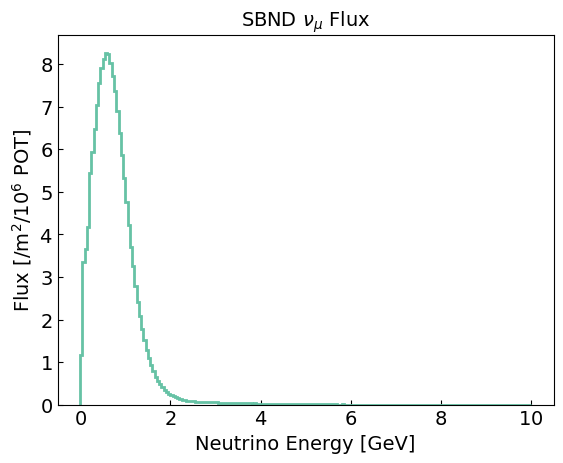

Integrated flux: 9.725e+12


In [32]:
# TODO: z-dependence?
# flux file, units: /m^2/10^6 POT 
# 50 MeV bins
fluxfile = "/exp/sbnd/data/users/munjung/flux/sbnd_original_flux.root"
flux = uproot.open(fluxfile)
print(flux.keys())

# numu flux
numu_flux = flux["flux_sbnd_numu"].to_numpy()
bin_edges = numu_flux[1]
flux_vals = numu_flux[0]

plt.hist(bin_edges[:-1], bins=bin_edges, weights=flux_vals, histtype="step", linewidth=2)
plt.xlabel("Neutrino Energy [GeV]")
plt.ylabel("Flux [/m$^{2}$/10$^{6}$ POT]")
plt.title("SBND $\\nu_\\mu$ Flux")

# if save_fig:
#     plt.savefig("{}/sbnd-flux.pdf".format(save_fig_dir))
plt.savefig("sbnd-flux.pdf", bbox_inches='tight')
plt.show()

# get integrated flux
integrated_flux = flux_vals.sum()
integrated_flux /= 1e4 # to cm2
INTEGRATED_FLUX = integrated_flux * mc_tot_pot / 1e6 # POT
print("Integrated flux: %.3e" % INTEGRATED_FLUX)

In [33]:
V_SBND = 380 * 380 * 440 # cm3, the active volume of the detector 
NTARGETS = RHO * V_SBND * N_A / M_AR
print("# of targets: ", NTARGETS)

# of targets:  1.3251484770937053e+30


In [34]:
# set to 1 for event rates
XSEC_UNIT = 1 / (INTEGRATED_FLUX * NTARGETS)
print("xsec unit: ", XSEC_UNIT)

xsec unit:  7.75964290085297e-44


# Set up utils and selections according to target channel

# Choose Variable to Unfold

In [35]:
# frac_cov_matrices = {}

In [176]:
# choose a variable to unfold, defined in variable_configs.py
var_config = VariableConfig.muon_momentum()
# var_config = VariableConfig.muon_direction()
# var_config = VariableConfig.proton_momentum()
# var_config = VariableConfig.proton_direction()
# var_config = VariableConfig.tki_del_Tp()
# var_config.var_nu_col = ('mc_del_Tp', '', '')
# var_config = VariableConfig.tki_del_Tp_x()
# var_config = VariableConfig.tki_del_Tp_y()
# var_config = VariableConfig.tki_del_alpha()
# var_config.var_nu_col = ('mc_del_alpha', '', '')
# var_config = VariableConfig.tki_del_phi()
# var_config.var_nu_col = ('mc_del_phi', '', '')

# single bin
var_config.bins = [np.min(var_config.bins), np.max(var_config.bins)]
var_config.bin_centers = [np.mean(var_config.bins)]
# save_fig = False

# Make dfs for analysis

np.clip is for including underflow events into the first bin and overflow events into the last bin

In [177]:
print("==== selected events ====")
mc_evt_df.loc[:,'nuint_categ'] = get_int_category(mc_evt_df)
mc_evt_df.loc[:,'genie_categ'] = get_genie_category(mc_evt_df)
print(mc_evt_df.nuint_categ.value_counts())
print(mc_evt_df.genie_categ.value_counts())

# print("==== all events ====")
# mcallnu_wgt_df.loc[:,'nuint_categ'] = get_int_category(mcallnu_wgt_df)
# mcallnu_wgt_df.loc[:,'genie_categ'] = get_genie_category(mcallnu_wgt_df)
# print(mcallnu_wgt_df.nuint_categ.value_counts())
# print(mcallnu_wgt_df.genie_categ.value_counts())


==== selected events ====
nuint_categ
 1    95171
 2     2934
 3     2912
 4     1557
-1      539
 0      154
 5      126
Name: count, dtype: int64
genie_categ
 1    84370
 2    12495
 3     4014
 6     1557
-1      539
 0      154
 4      128
 7      126
 5       10
Name: count, dtype: int64


In [178]:
# Total MC reco muon momentum: for fake data
eps = 1e-8
var_total_mc = mc_evt_df[var_config.var_evt_reco_col]
var_total_mc = np.clip(var_total_mc, var_config.bins[0], var_config.bins[-1] - eps)
weights_total_mc = mc_evt_df.loc[:, 'pot_weight']

# --- all events, selected ---
# mc_evt_df divided into topology modes for subtraction from data in future
# first item in list is the signal topology
mc_evt_df_divided = [mc_evt_df[mc_evt_df.nuint_categ == mode]for mode in topology_list]

# Reco variable distribution for each 'nuint_categ' for stack plot and subtraction from the fake data
var_per_nuint_categ_mc = [mc_evt_df[mc_evt_df.nuint_categ == mode][var_config.var_evt_reco_col]for mode in topology_list]
var_per_nuint_categ_mc = [s.clip(var_config.bins[0], var_config.bins[-1] - eps) for s in var_per_nuint_categ_mc]
weights_per_categ = [mc_evt_df.loc[mc_evt_df.nuint_categ == mode, 'pot_weight'] for mode in topology_list]

# Reco variable distribution for each genie mode
var_per_genie_mode_mc = [mc_evt_df[mc_evt_df.genie_categ == mode][var_config.var_evt_reco_col]for mode in genie_mode_list]
var_per_genie_mode_mc = [s.clip(var_config.bins[0], var_config.bins[-1] - eps) for s in var_per_genie_mode_mc]
weights_per_genie_mode = [mc_evt_df.loc[mc_evt_df.genie_categ == mode, 'pot_weight'] for mode in genie_mode_list]


# --- signal events ---
# selected, for response matrix
# Signal event's reco muon momentum after the event selection
var_signal_sel_reco = mc_evt_df[mc_evt_df.nuint_categ == 1][var_config.var_evt_reco_col]
var_signal_sel_reco = np.clip(var_signal_sel_reco, var_config.bins[0], var_config.bins[-1] - eps)
weight_signal = mc_evt_df.loc[mc_evt_df.nuint_categ == 1, 'pot_weight']

# Signal event's true muon momentum after the event selection
var_signal_sel_truth = mc_evt_df[mc_evt_df.nuint_categ == 1][var_config.var_evt_truth_col]
var_signal_sel_truth = np.clip(var_signal_sel_truth, var_config.bins[0], var_config.bins[-1] - eps)
weight_true_signal = mc_evt_df.loc[mc_evt_df.nuint_categ == 1, 'pot_weight']

# total generated, for efficiency vector
# Signal event's true muon momentum without event selection
# var_truth_signal = mcallnu_wgt_df[mcallnu_wgt_df.nuint_categ == 1][var_config.var_nu_col]
# var_truth_signal = np.clip(var_truth_signal, var_config.bins[0], var_config.bins[-1] - eps)
# weight_truth_signal = np.full_like(var_truth_signal, mc_pot_scale, dtype=float)

# Response Matrix

Draw true (before event selection) and reco (after event selection) muon momentum distributions of signal events.
Print entries for double check.

[95171.]
[95171.]


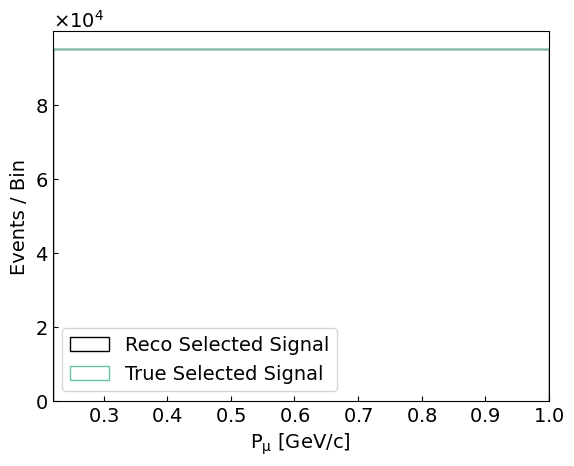

In [179]:
# nevts_signal_truth, _, _ = plt.hist(var_truth_signal, bins=var_config.bins, weights=weight_truth_signal, histtype="step", label="True Signal")
nevts_signal_sel_reco, _, _ = plt.hist(var_signal_sel_reco, bins=var_config.bins, weights=weight_signal, histtype="step", label="Reco Selected Signal", color="k")
nevts_signal_sel_truth, _, _ = plt.hist(var_signal_sel_truth, bins=var_config.bins, weights=weight_signal, histtype="step", label="True Selected Signal")
# print(nevts_signal_truth)
print(nevts_signal_sel_reco)
print(nevts_signal_sel_truth)
plt.legend()
plt.ylabel("Events / Bin")
plt.xlim(var_config.bins[0], var_config.bins[-1])
plt.xlabel(var_config.var_labels[0])
if save_fig:
    plt.savefig("{}/{}-sel_event_rates.pdf".format(save_fig_dir, var_config.var_save_name), bbox_inches='tight')
plt.show()

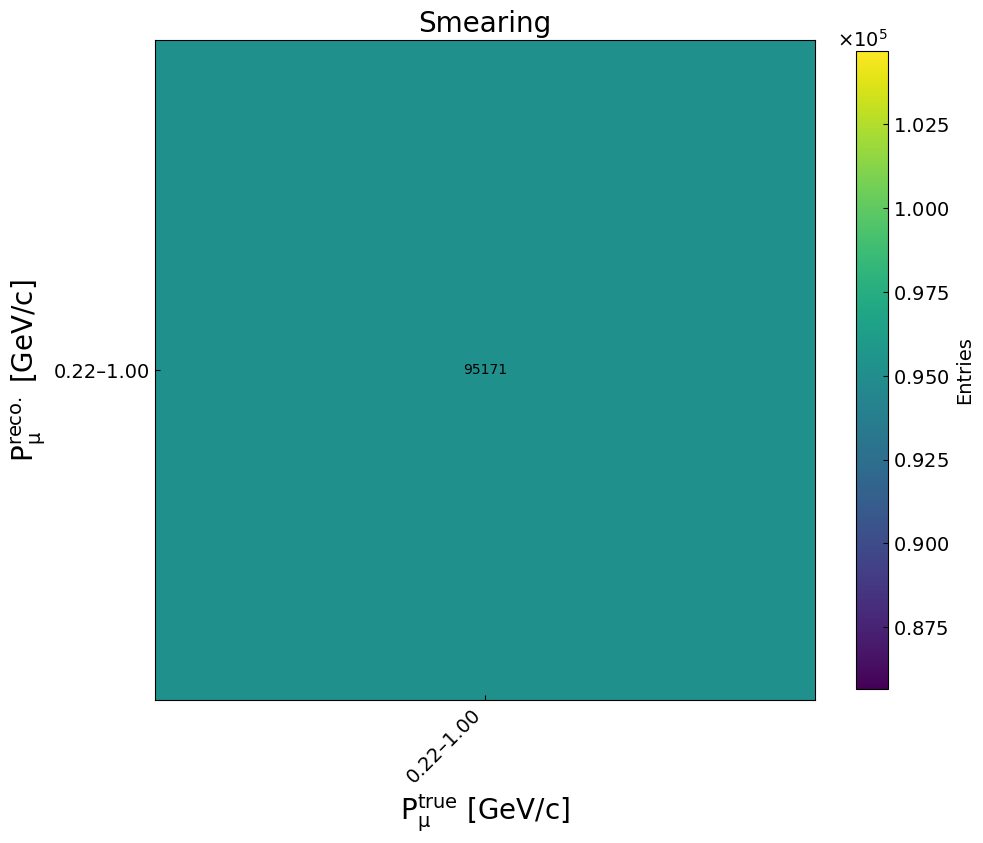

In [180]:
bins_2d = [var_config.bins, var_config.bins]# = [np.array([0.2, 2]), np.array([0.2, 2])] # commented out lines for 1 bin MC closure test

save_fig_name = "{}/{}-reco_vs_true".format(save_fig_dir, var_config.var_save_name)
reco_vs_true = get_smear_matrix(var_signal_sel_truth, var_signal_sel_reco, bins_2d, var_labels=var_config.var_labels,
                                save_fig=save_fig, save_fig_name=save_fig_name)
# eff = get_eff(reco_vs_true, nevts_signal_truth)
# print("eff")
# # print(eff)

# save_fig_name = "{}/{}-response_matrix".format(save_fig_dir, var_config.var_save_name)
# Response = get_response_matrix(reco_vs_true, eff, var_config.bins, var_labels=var_config.var_labels,
#                                save_fig=save_fig, save_fig_name=save_fig_name)

# Covariance

In [181]:
def get_covariance(cov_type, syst_name, n_univ, 
                   nevts_signal_sel_reco, var_signal_sel_truth, var_signal_sel_reco, bins, 
                   plot_labels, show_fig=True, save_fig=False, save_fig_name=None):

    if cov_type == "xsec":
        scale_factor = XSEC_UNIT
        print("generating covariance for xsec, using scale factor: {}".format(scale_factor))

    elif cov_type == "event":
        print("generating covariance for event rate")
        scale_factor = 1

    else:
        raise ValueError("Invalid cov_type: {}".format(cov_type))

    
    signal_cv = nevts_signal_sel_reco * scale_factor # = Response @ true_signal

    Covariance_Frac = np.zeros((len(signal_cv), len(signal_cv)))
    Covariance = np.zeros((len(signal_cv), len(signal_cv)))

    # init figure to plot event rates
    fig, ax = plt.subplots()

    univ_events = []
    univ_effs = []
    univ_smears = []
    for uidx in range(n_univ):
        univ_col_evt = (syst_name, "univ_{}".format(uidx), "", "", "", "", "", "")
        univ_col_mc = (syst_name, "univ_{}".format(uidx), "")

        # ---- uncertainty on the signal rate ----
        # GENIE syst need special treatment
        # we don't want uncertainty on the xsec
        # only consider its effect on the response matrix
        if ("GENIE" in syst_name or "ZExpPCA" in syst_name) and cov_type == "xsec":
            true_signal_univ, _ = np.histogram(var_truth_signal, bins=var_config.bins, 
                                            weights=weight_truth_signal*mcallnu_wgt_df[mcallnu_wgt_df.nuint_categ == 1][univ_col_mc])
            
            # new response matrix for univ
            bins2d = [var_config.bins, var_config.bins]
            reco_vs_true = get_smear_matrix(var_signal_sel_truth, var_signal_sel_reco, bins2d,
                                            weights=mc_evt_df[mc_evt_df.nuint_categ == 1][univ_col_evt], plot=False)
            univ_smears.append(reco_vs_true)

            eff = get_eff(reco_vs_true, true_signal_univ) 
            univ_effs.append(eff)

            Response_univ = get_response_matrix(reco_vs_true, eff, bins, plot=False)
            signal_univ = Response_univ @ nevts_signal_truth # note that we multiply the CV signal rate!
            # signal_univ = signal_cv

        # for other systs, we just take the univ signal event rate
        else:
            signal_univ, _ = np.histogram(var_signal_sel_reco, bins=var_config.bins, 
                                             weights=mc_evt_df[mc_evt_df.nuint_categ == 1][univ_col_evt])

        signal_univ = np.array(signal_univ) * scale_factor

        # ---- uncertainty on the background rate ----
        # loop over background categories
        # + univ background - cv background
        # note: cv background subtraction cancels out with the cv background subtraction for the cv event rate. 
        #       doing it anyways for the plot of universes on background subtracted event rate.
        for this_mc_evt_df in mc_evt_df_divided[1:]:
            weights = this_mc_evt_df[univ_col_evt].copy()
            weights[np.isnan(weights)] = 1 ## IMPORTANT: make nan weights to 1. to ignore them
            this_var = this_mc_evt_df[var_config.var_evt_reco_col]
            this_var = np.clip(this_var, var_config.bins[0], var_config.bins[-1] - eps)
            background_univ, _ = np.histogram(this_var, bins=var_config.bins, weights=weights)
            background_cv, _ = np.histogram(this_var, bins=var_config.bins)
            background_univ = np.array(background_univ) * scale_factor
            background_cv = np.array(background_cv) * scale_factor
            signal_univ += background_univ - background_cv


        univ_events.append(signal_univ)

        # ---- covariance calculation for this universe ----
        # I'm looping & calculating with the CV value for clarity, 
        # but techincally np.cov should also be fine under the assumption of gaussian universes that we're using
        for i in range(len(signal_univ)):
            for j in range(len(signal_univ)):
                nom_i = signal_cv[i] 
                nom_j = signal_cv[j] 

                univ_i = signal_univ[i] 
                univ_j = signal_univ[j] 

                cov_entry = (univ_i - nom_i) * (univ_j - nom_j)
                frac_cov_entry = ((univ_i - nom_i) / nom_i) * ( (univ_j - nom_j) / nom_j)

                # TODO: this clipping exists in the uboone code, but I'm not sure why..?
                # if cov_entry > 0:
                #     this_cov = max( cov_entry, eps * scale_factor)
                # else:
                #     this_cov = min( cov_entry, eps * scale_factor)

                # if frac_cov_entry > 0:
                #     this_frac_cov = max( frac_cov_entry, eps * scale_factor)
                # else:
                #     this_frac_cov = min( frac_cov_entry, eps * scale_factor)

                Covariance[i, j] += cov_entry
                Covariance_Frac[i, j] += frac_cov_entry

    # plot universe variations
    # for i in range(n_univ):
    #     plt.hist(var_config.bin_centers, bins=var_config.bins, weights=univ_events[i], histtype="step", color="steelblue", linewidth=1, alpha=0.5)
    # plt.hist(var_config.bin_centers, bins=var_config.bins, weights=signal_cv, histtype="step", color="black")
    if n_univ > 10:
        sorted_univs = np.sort(univ_events, axis=0)
        n_68 = int(0.68 * n_univ)
        start_68 = (n_univ - n_68) // 2
        end_68 = start_68 + n_68
        for i in range(start_68, end_68):
            if i == start_68:
                plt.hist(var_config.bin_centers, bins=var_config.bins, weights=sorted_univs[i], histtype="step", color="C4", alpha=0.7, label="Universe (68%)")
            else:
                plt.hist(var_config.bin_centers, bins=var_config.bins, weights=sorted_univs[i], histtype="step", color="C4", alpha=0.7)

        n_95 = int(0.95 * n_univ)
        start_95 = (n_univ - n_95) // 2
        end_95 = start_95 + n_95
        for i in range(start_95, end_95):
            if i in range(start_68, end_68):
                continue
            if i == start_95:
                plt.hist(var_config.bin_centers, bins=var_config.bins, weights=sorted_univs[i], histtype="step", color="C5", alpha=0.7, label="Universe (95%)")
            else:
                plt.hist(var_config.bin_centers, bins=var_config.bins, weights=sorted_univs[i], histtype="step", color="C5", alpha=0.7)

        for i in range(n_univ):
            if i in range(start_95, end_95):
                continue
            if i == 0:
                plt.hist(var_config.bin_centers, bins=var_config.bins, weights=sorted_univs[i], histtype="step", color="C2", alpha=0.7, label="Universe (100%)")
            else:
                plt.hist(var_config.bin_centers, bins=var_config.bins, weights=sorted_univs[i], histtype="step", color="C2", alpha=0.7)
    else:
        for i in range(n_univ):
            if i == 0:
                plt.hist(var_config.bin_centers, bins=var_config.bins, weights=univ_events[i], histtype="step", color="C2", label="Universe")
            else:
                plt.hist(var_config.bin_centers, bins=var_config.bins, weights=univ_events[i], histtype="step", color="C2")

    plt.hist(var_config.bin_centers, bins=var_config.bins, weights=signal_cv, histtype="step", color="k", label="Central Value")

    # plot configs
    plt.xlim(var_config.bins[0], var_config.bins[-1])
    plt.xlabel(plot_labels[0])
    plt.ylabel(plot_labels[1])
    if plot_labels[2]:
        plt.title(plot_labels[2])
    else:
        plt.title(syst_name)

    plt.text(0.05, 0.05, "SBND Internal", fontsize=12, color="rosybrown", ha="left", va="bottom", transform=ax.transAxes)

    # # legend from dummies
    # plt.hist([], bins=var_config.bins, histtype="step", color="black", label="Central Value")
    # plt.hist([], bins=var_config.bins, histtype="step", color="steelblue", label="Universe Value", alpha=0.5)
    plt.legend(reverse=True, frameon=False)

    Covariance = Covariance / n_univ
    Covariance_Frac = Covariance_Frac / n_univ
    Correlation = np.zeros_like(Covariance)
    for i in range(len(signal_cv)):
        for j in range(len(signal_cv)):
            Correlation[i, j] = Covariance[i, j] / (np.sqrt(Covariance[i, i]) * np.sqrt(Covariance[j, j]))

    if save_fig:
        plt.savefig("{}.png".format(save_fig_name), bbox_inches='tight', dpi=300)

    if show_fig:
        plt.show()

    return {"Covariance_Frac": Covariance_Frac, 
            "Covariance": Covariance,
            "Correlation": Correlation,
            "cv_events": signal_cv,
            "univ_events": univ_events,
            "univ_effs": univ_effs,
            "univ_smears": univ_smears,
            }

In [182]:
# pretty heatmap plotter

unif_bin = np.linspace(0., float(len(var_config.bins) - 1), len(var_config.bins))
extent = [unif_bin[0], unif_bin[-1], unif_bin[0], unif_bin[-1]]

x_edges = np.array(var_config.bins)
y_edges = np.array(var_config.bins)
x_tick_positions = (unif_bin[:-1] + unif_bin[1:]) / 2
y_tick_positions = (unif_bin[:-1] + unif_bin[1:]) / 2

x_labels = bin_range_labels(x_edges)
y_labels = bin_range_labels(y_edges)

def plot_heatmap(matrix, title, plot_labels=var_config.var_labels, save_fig=False, save_fig_name=None):
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.imshow(matrix, extent=extent, origin="lower")
    plt.colorbar(shrink=0.7)
    plt.xticks(x_tick_positions, x_labels, rotation=45, ha="right")
    plt.yticks(y_tick_positions, y_labels)
    plt.xlabel(plot_labels[0])
    plt.ylabel(plot_labels[1])
    for i in range(matrix.shape[0]):      # rows (y)
        for j in range(matrix.shape[1]):  # columns (x)
            value = matrix[i, j]
            if not np.isnan(value):  # skip NaNs
                plt.text(
                    j + 0.5, i + 0.5,
                    f"{value:.2f}",
                    ha="center", va="center",   
                    color=get_text_color(value),
                    fontsize=10
                )
    plt.title(title)
    if save_fig:
        plt.savefig("{}.png".format(save_fig_name), bbox_inches='tight', dpi=300)
    plt.show();

## Corsika

- use difference between off-beam MC and data as a unisim syst
- using dfs with off-beam data / MC with the **same** nu event selection applied

In [115]:
n_max_concat = 10
data_keys2load = ['evt', 'hdr']
data_offbeam_file = "/exp/sbnd/data/users/munjung/xsec/2025B/Data_offbeam-sel_final.df"
data_offbeam_dfs = load_dfs(data_offbeam_file, data_keys2load, n_max_concat=n_max_concat)
data_offbeam_evt_df = data_offbeam_dfs['evt']
data_offbeam_hdr_df = data_offbeam_dfs['hdr']
data_offbeam_gates = data_offbeam_hdr_df[data_offbeam_hdr_df['first_in_subrun'] == 1]['noffbeambnb'].sum()
print("intime cosmics data gates: {:.2e}".format(data_offbeam_gates))

mc_keys2load = ['evt', 'hdr']
mc_offbeam_file = '/exp/sbnd/data/users/munjung/xsec/2025B/MC_offbeam-sel_final.df'
mc_offbeam_dfs = load_dfs(mc_offbeam_file, mc_keys2load, n_max_concat=n_max_concat)
mc_offbeam_evt_df = mc_offbeam_dfs['evt']
mc_offbeam_hdr_df = mc_offbeam_dfs['hdr']
mc_offbeam_gates = mc_offbeam_hdr_df[mc_offbeam_hdr_df['first_in_subrun'] == 1]['ngenevt'].sum()
print("intime cosmics MC gates: {:.2e}".format(mc_offbeam_gates))

offbeam_scale = data_offbeam_gates/mc_offbeam_gates
print("offbeam scale: {:.2f}".format(offbeam_scale))

# convert del_alpha and del_phi unit to degrees
data_offbeam_evt_df["del_alpha"] = data_offbeam_evt_df["del_alpha"] * 180 / np.pi
data_offbeam_evt_df["del_phi"] = data_offbeam_evt_df["del_phi"] * 180 / np.pi
mc_offbeam_evt_df["del_alpha"] = mc_offbeam_evt_df["del_alpha"] * 180 / np.pi
mc_offbeam_evt_df["del_phi"] = mc_offbeam_evt_df["del_phi"] * 180 / np.pi


intime cosmics data gates: 1.36e+08
intime cosmics MC gates: 1.41e+07
offbeam scale: 9.66


In [ ]:
# check that the average of universes' weights is ~ CV value
fig, ax = plt.subplots(2,1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
data_avg_events, _, _ = ax[0].hist(data_offbeam_evt_df[var_config.var_evt_reco_col], bins=var_config.bins, histtype="step", color="red", label="Off-Beam Data")
mc_weights = np.ones(len(mc_offbeam_evt_df))*offbeam_scale
mc_events, _, _ = ax[0].hist(mc_offbeam_evt_df[var_config.var_evt_reco_col], bins=var_config.bins, weights=mc_weights, histtype="step", color="black", label="Off-Beam MC")
ax[0].set_xlim(var_config.bins[0], var_config.bins[-1])
ax[0].set_ylabel("Events / Bin")
ax[0].legend()

bin_centers = (var_config.bins[1:] + var_config.bins[:-1]) / 2
# data_avg_events = np.clip(data_avg_events, eps, 1/eps)
# mc_events = np.clip(mc_events, eps, 1/eps)
ratio = data_avg_events/mc_events

# use data/MC ratio as bin scale factors to make alt univ MC
cosmics_univ_weights = ratio
# fill inf and nan with 2
cosmics_univ_weights[np.isinf(cosmics_univ_weights)] = 2
cosmics_univ_weights[np.isnan(cosmics_univ_weights)] = 2
print(cosmics_univ_weights)

ax[1].hist(bin_centers, bins=var_config.bins, weights=cosmics_univ_weights, histtype="step", color="black")
ax[1].set_xlim(var_config.bins[0], var_config.bins[-1])
ax[1].set_xlabel(var_config.var_labels[0])
ax[1].set_ylabel("Data/MC")
ax[1].set_xlabel(var_config.var_labels[0])
ax[1].axhline(1.0, color="gray", linestyle="--")
ax[1].set_ylim(0., 2.1)
ax[1].grid(True)

plt.show();

In [ ]:
# directly calculate cov (can't convert to universes & plug into get_covariance because we're using bin scale factors)
# TODO: probably good to define the cov element calculation as a function called by both places (here and in get_covariance)

scale_factor = 1  # event rate
signal_cv = nevts_signal_sel_reco * scale_factor 

Cosmics_Covariance_Frac = np.zeros((len(signal_cv), len(signal_cv)))
Cosmics_Covariance = np.zeros((len(signal_cv), len(signal_cv)))
univ_events = []

# signal doesn't change
signal_univ, _ = np.histogram(var_signal_sel_reco, bins=var_config.bins)
signal_univ = np.array(signal_univ) * scale_factor

# only background changing is the cosmics
# cosmics are saved as the last item in mc_evt_df_divided
this_mc_evt_df = mc_evt_df_divided[-1]
this_var = this_mc_evt_df[var_config.var_evt_reco_col]
this_var = np.clip(this_var, var_config.bins[0], var_config.bins[-1] - eps)
background_cv, _ = np.histogram(this_var, bins=var_config.bins)
background_univ = np.array(background_cv) * np.array(cosmics_univ_weights) * scale_factor
background_cv = np.array(background_cv) * scale_factor
signal_univ = signal_univ.astype(float)
signal_univ += background_univ - background_cv

univ_events.append(signal_univ)
print(signal_univ)
print(signal_cv)
plt.hist(var_config.bin_centers, bins=var_config.bins, weights=signal_cv, histtype="step", color="black")
plt.hist(var_config.bin_centers, bins=var_config.bins, weights=signal_univ, histtype="step", color="steelblue")

# ---- covariance calculation for this universe ----
# I'm looping & calculating with the CV value for clarity, 
# but techincally np.cov should also be fine under the assumption of gaussian universes that we're using
for i in range(len(signal_univ)):
    for j in range(len(signal_univ)):
        nom_i = signal_cv[i] 
        nom_j = signal_cv[j] 

        univ_i = signal_univ[i] 
        univ_j = signal_univ[j] 

        cov_entry = (univ_i - nom_i) * (univ_j - nom_j)
        frac_cov_entry = ((univ_i - nom_i) / nom_i) * ( (univ_j - nom_j) / nom_j)

        # TODO: this clipping exists in the uboone code, but I'm not sure why..?
        # if cov_entry > 0:
        #     this_cov = max( cov_entry, eps * scale_factor)
        # else:
        #     this_cov = min( cov_entry, eps * scale_factor)

        # if frac_cov_entry > 0:
        #     this_frac_cov = max( frac_cov_entry, eps * scale_factor)
        # else:
        #     this_frac_cov = min( frac_cov_entry, eps * scale_factor)

        Cosmics_Covariance[i, j] += cov_entry
        Cosmics_Covariance_Frac[i, j] += frac_cov_entry

plt.xlim(var_config.bins[0], var_config.bins[-1])
plt.xlabel(var_config.var_labels[0])
plt.ylabel(var_config.var_labels[1])
plt.title("Cosmics")
plt.show()

In [ ]:
# sign of fractional covariance is different from the other two?
syst_name = "cosmics"
save_fig_name = "{}/{}-{}-cosmics_covariance".format(save_fig_dir, var_config.var_save_name, syst_name)
plot_heatmap(Cosmics_Covariance, "Covariance - cosmics",
             save_fig=save_fig, save_fig_name=save_fig_name)
save_fig_name = "{}/{}-{}-cosmics_covariance_frac".format(save_fig_dir, var_config.var_save_name, syst_name)
plot_heatmap(Cosmics_Covariance_Frac, "Fractional Covariance - cosmics",
             save_fig=save_fig, save_fig_name=save_fig_name)

## Flux

In [ ]:
syst_name = "Flux"
n_univ_flux = 500

cov_type = "event"
plot_labels = [var_config.var_labels[1], "Flux Integrated Event Rate"]
save_fig_name = "{}/{}-{}-univ_{}_rates".format(save_fig_dir, var_config.var_save_name, syst_name, cov_type)
ret_flux = get_covariance(cov_type, syst_name, n_univ_flux, 
                          nevts_signal_sel_reco, var_signal_sel_truth, var_signal_sel_reco, var_config.bins, 
                          plot_labels, save_fig=save_fig, save_fig_name=save_fig_name)

cov_type = "xsec"
plot_labels = [var_config.var_labels[1], "xsec"]
save_fig_name = "{}/{}-{}-univ_{}_rates".format(save_fig_dir, var_config.var_save_name, syst_name, cov_type)
ret_flux = get_covariance(cov_type, syst_name, n_univ_flux, 
                          nevts_signal_sel_reco, var_signal_sel_truth, var_signal_sel_reco, var_config.bins, 
                          plot_labels, save_fig=save_fig, save_fig_name=save_fig_name)

In [ ]:
syst_name = "Flux"
save_fig_name = "{}/{}-{}-covariance".format(save_fig_dir, var_config.var_save_name, syst_name)
plot_heatmap(ret_flux["Covariance"], "{} Covariance".format(syst_name),
             save_fig=save_fig, save_fig_name=save_fig_name)
save_fig_name = "{}/{}-{}-covariance_frac".format(save_fig_dir, var_config.var_save_name, syst_name)
plot_heatmap(ret_flux["Covariance_Frac"], "{} Fractional Covariance".format(syst_name),
             save_fig=save_fig, save_fig_name=save_fig_name)
save_fig_name = "{}/{}-{}-correlation".format(save_fig_dir, var_config.var_save_name, syst_name)
plot_heatmap(ret_flux["Correlation"], "{} Correlation".format(syst_name),
             save_fig=save_fig, save_fig_name=save_fig_name)

## GENIE

### multisim

generating covariance for event rate


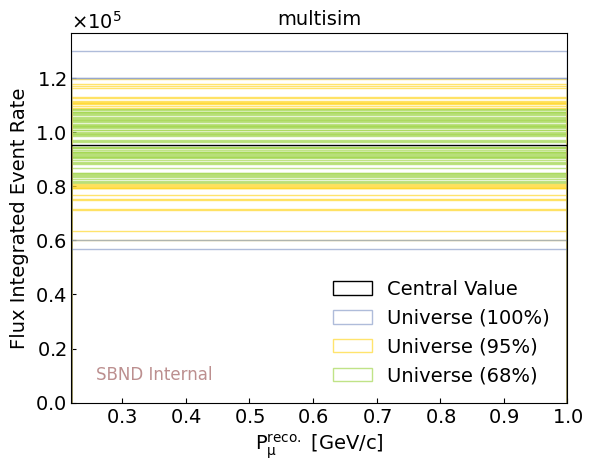

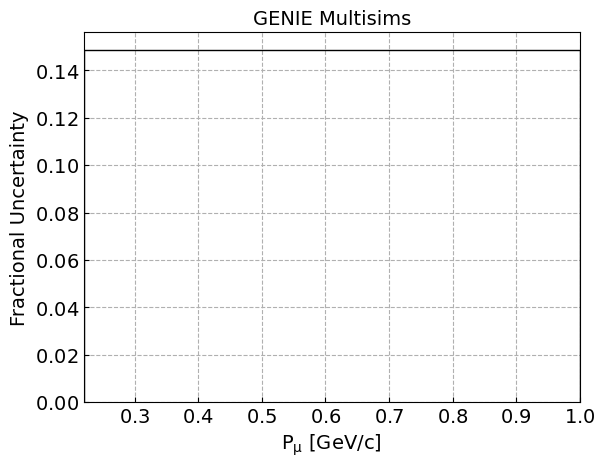

In [183]:
# multisim
n_univ_genie = 100
syst_name = "GENIE"

cov_type = "event"
plot_labels = [var_config.var_labels[1], "Flux Integrated Event Rate", "multisim"]
save_fig_name = "{}/{}-{}-genie_univ_{}_rates".format(save_fig_dir, var_config.var_save_name, syst_name, cov_type)
ret_genie_evt = get_covariance(cov_type, syst_name, n_univ_genie, 
                          nevts_signal_sel_reco, var_signal_sel_truth, var_signal_sel_reco, var_config.bins, 
                          plot_labels, save_fig=save_fig, save_fig_name=save_fig_name)

frac_cov = ret_genie_evt["Covariance_Frac"]
frac_unc = np.sqrt(np.diag(frac_cov))
plt.hist(var_config.bin_centers, bins=var_config.bins, weights=frac_unc, histtype="step", color="black")
plt.xlim(var_config.bins[0], var_config.bins[-1])
plt.xlabel(var_config.var_labels[0])
plt.ylabel("Fractional Uncertainty")
plt.grid(True)
plt.title("GENIE Multisims")
plt.show();

# cov_type = "xsec"
# plot_labels = [var_config.var_labels[1], "xsec"]
# save_fig_name = "{}/{}-{}-genie_univ_{}_rates".format(save_fig_dir, var_config.var_save_name, syst_name, cov_type)
# ret_genie = get_covariance(cov_type, syst_name, n_univ_genie, 
#                           nevts_signal_sel_reco, var_signal_sel_truth, var_signal_sel_reco, var_config.bins, 
#                           plot_labels, save_fig=save_fig, save_fig_name=save_fig_name)


# frac_cov = ret_genie["Covariance_Frac"]
# frac_unc = np.sqrt(np.diag(frac_cov))
# plt.hist(var_config.bin_centers, bins=var_config.bins, weights=frac_unc, histtype="step", color="black")
# plt.xlim(var_config.bins[0], var_config.bins[-1])
# plt.xlabel(var_config.var_labels[0])
# plt.ylabel("Fractional Uncertainty")
# plt.grid(True)
# plt.title("GENIE Multisims")
# plt.show();

In [167]:
# cov_matrix = ret_genie_evt_rates["Covariance"]
# n_univs_genie = np.random.multivariate_normal(nevts_signal_sel_reco, cov_matrix, size=100)

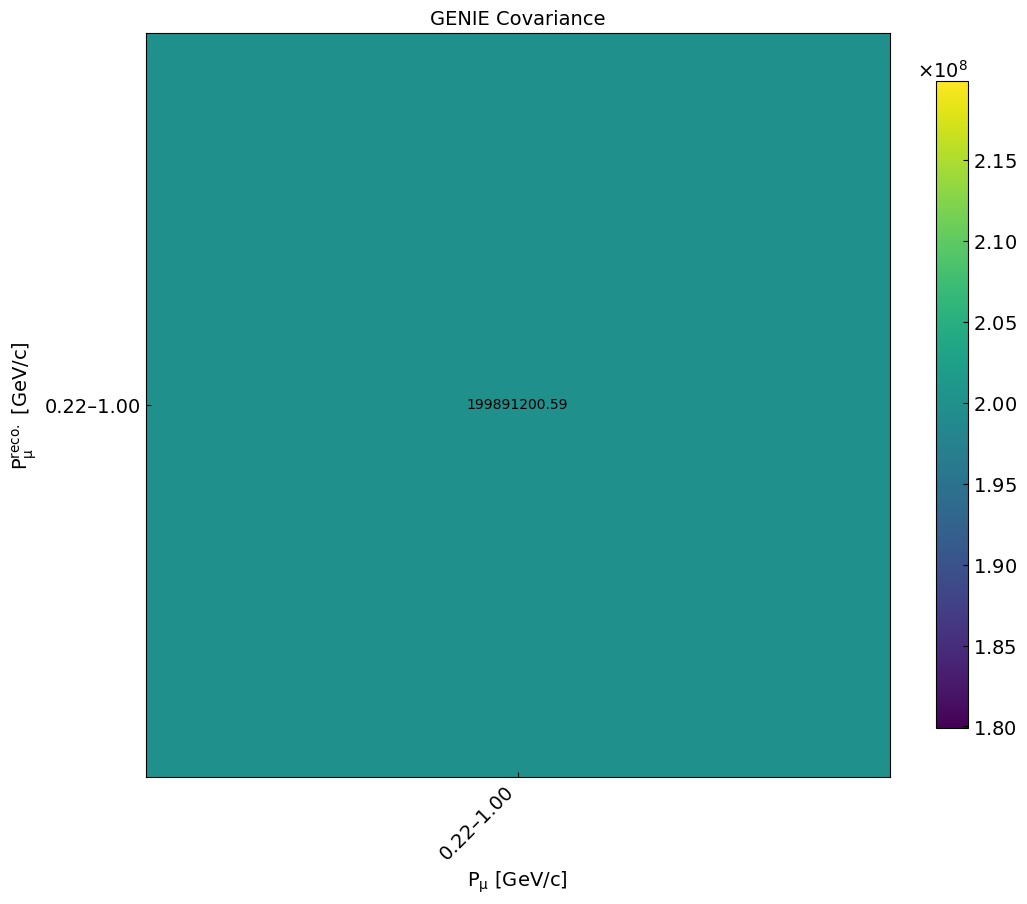

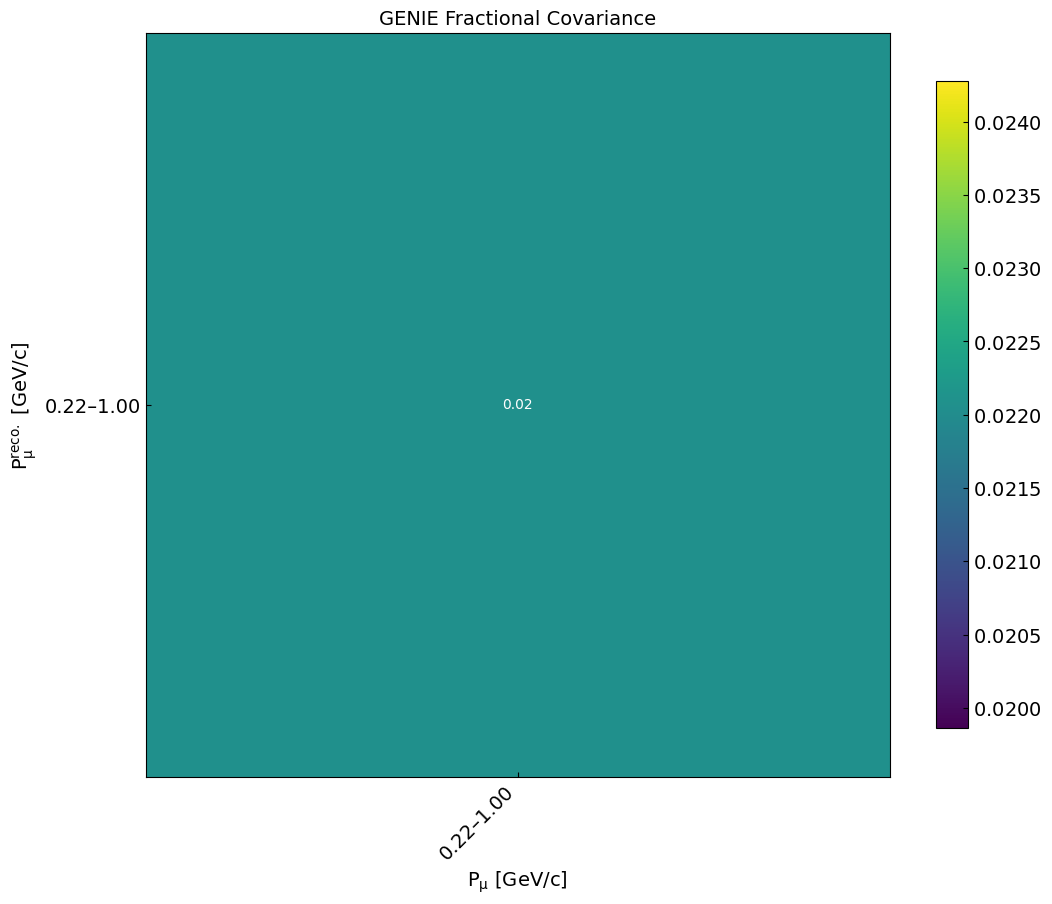

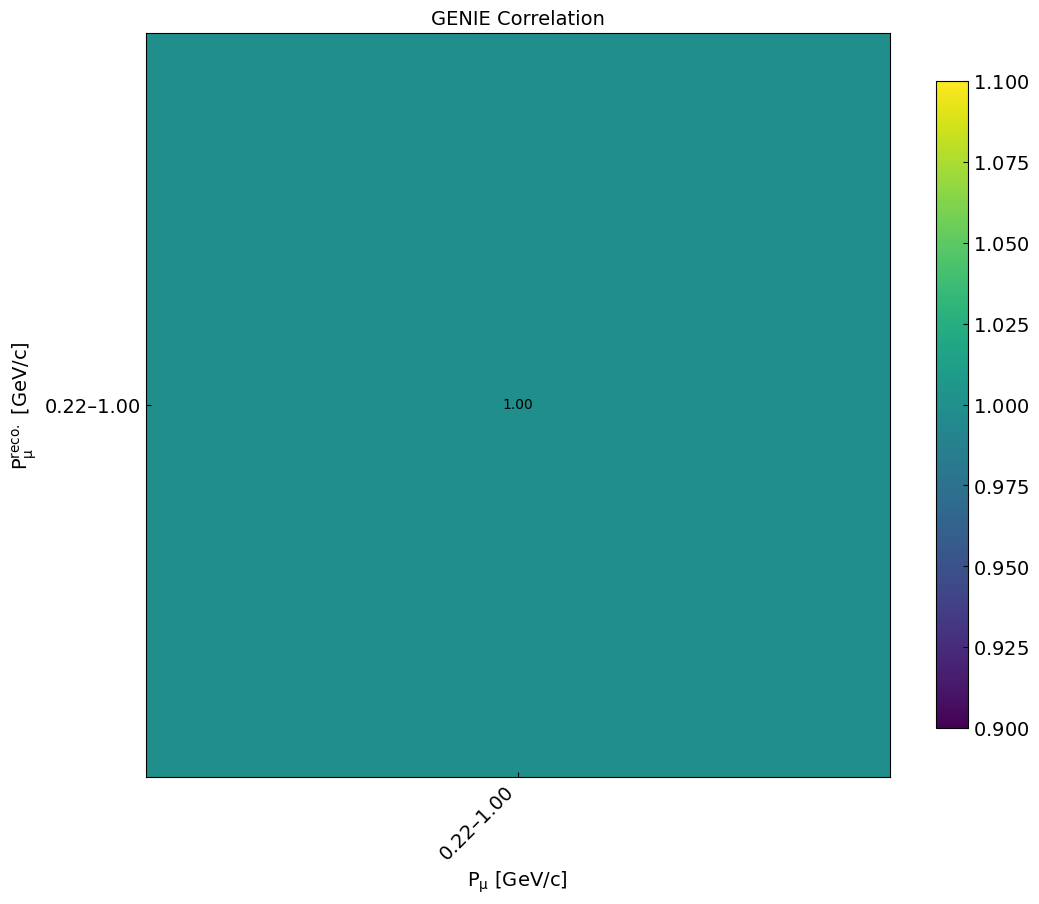

In [184]:
syst_name = "GENIE"
save_fig_name = "{}/{}-{}-evt-covariance".format(save_fig_dir, var_config.var_save_name, syst_name)
plot_heatmap(ret_genie_evt["Covariance"], "{} Covariance".format(syst_name),
             save_fig=save_fig, save_fig_name=save_fig_name)
save_fig_name = "{}/{}-{}-evt-covariance_frac".format(save_fig_dir, var_config.var_save_name, syst_name)
plot_heatmap(ret_genie_evt["Covariance_Frac"], "{} Fractional Covariance".format(syst_name),
             save_fig=save_fig, save_fig_name=save_fig_name)
save_fig_name = "{}/{}-{}-evt-correlation".format(save_fig_dir, var_config.var_save_name, syst_name)
plot_heatmap(ret_genie_evt["Correlation"], "{} Correlation".format(syst_name),
             save_fig=save_fig, save_fig_name=save_fig_name)

# save_fig_name = "{}/{}-{}-covariance".format(save_fig_dir, var_config.var_save_name, syst_name)
# plot_heatmap(ret_genie["Covariance"], "{} Covariance".format(syst_name),
#              save_fig=save_fig, save_fig_name=save_fig_name)
# save_fig_name = "{}/{}-{}-covariance_frac".format(save_fig_dir, var_config.var_save_name, syst_name)
# plot_heatmap(ret_genie["Covariance_Frac"], "{} Fractional Covariance".format(syst_name),
#              save_fig=save_fig, save_fig_name=save_fig_name)
# save_fig_name = "{}/{}-{}-correlation".format(save_fig_dir, var_config.var_save_name, syst_name)
# plot_heatmap(ret_genie["Correlation"], "{} Correlation".format(syst_name),
#              save_fig=save_fig, save_fig_name=save_fig_name)

### morph

generating covariance for event rate


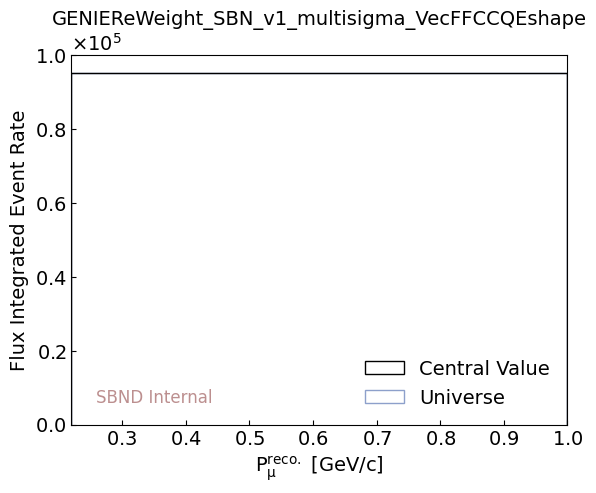

generating covariance for event rate


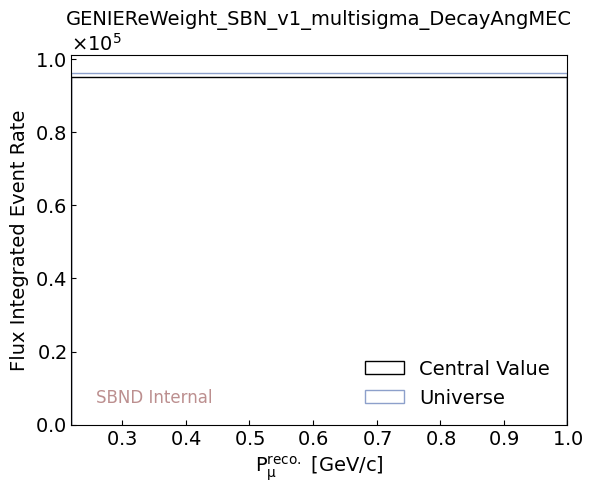

generating covariance for event rate


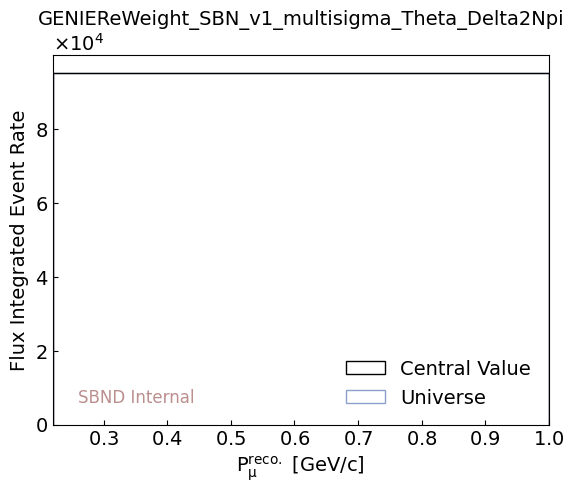

generating covariance for event rate


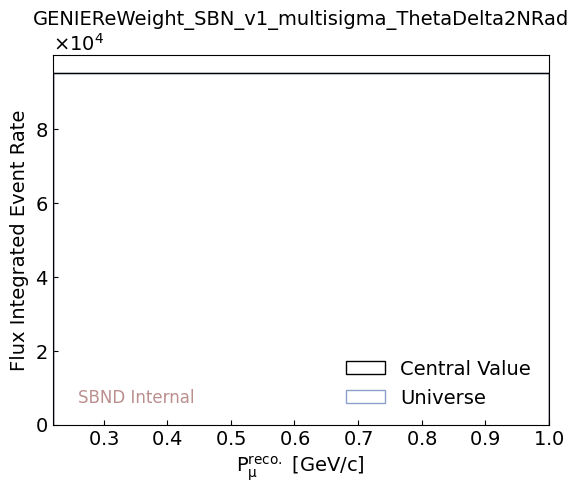

In [185]:
n_univ_genie_morph = 1

cov_type = "event"
GENIEmorph_Frac_Covariance_event = np.zeros((len(var_config.bins)-1, len(var_config.bins)-1))
plot_labels = [var_config.var_labels[1], "Flux Integrated Event Rate", ""]
for kidx, knob in enumerate(regen_systematics_sbnd_morph):
    syst_name = knob
    save_fig_name = "{}/{}-{}-geniemorph_univ_{}_rates".format(save_fig_dir, var_config.var_save_name, syst_name, cov_type)
    save_fig_name = "test.png"
    ret_geniemorph = get_covariance(cov_type, syst_name, n_univ_genie_morph, 
                            nevts_signal_sel_reco, var_signal_sel_truth, var_signal_sel_reco, var_config.bins, 
                            plot_labels, save_fig=save_fig, save_fig_name=save_fig_name)
    GENIEmorph_Frac_Covariance_event = GENIEmorph_Frac_Covariance_event + ret_geniemorph["Covariance_Frac"]

# cov_type = "xsec"
# GENIEmorph_Frac_Covariance = np.zeros((len(var_config.bins)-1, len(var_config.bins)-1))
# plot_labels = [var_config.var_labels[1], "xsec"]
# for kidx, knob in enumerate(regen_systematics_sbnd_morph):
#     syst_name = knob
#     save_fig_name = "{}/{}-{}-geniemorph_univ_{}_rates".format(save_fig_dir, var_config.var_save_name, syst_name, cov_type)
#     save_fig_name = "test.png"
#     ret_geniemorph = get_covariance(cov_type, syst_name, n_univ_genie_morph, 
#                             nevts_signal_sel_reco, var_signal_sel_truth, var_signal_sel_reco, var_config.bins, 
#                             plot_labels, save_fig=save_fig, save_fig_name=save_fig_name)
#     GENIEmorph_Frac_Covariance = GENIEmorph_Frac_Covariance + ret_geniemorph["Covariance_Frac"]


### multisigma

generating covariance for event rate


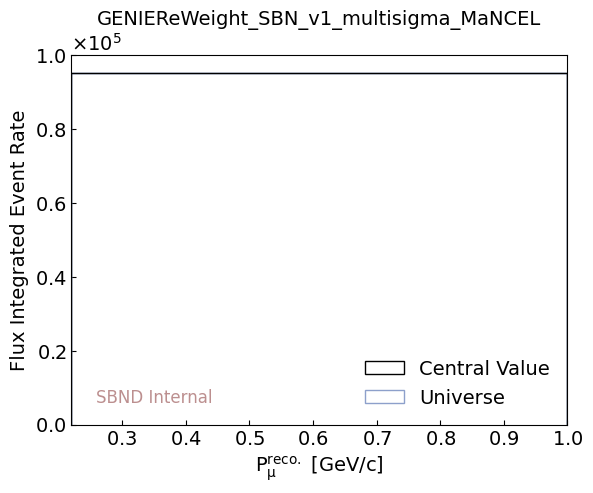

generating covariance for event rate


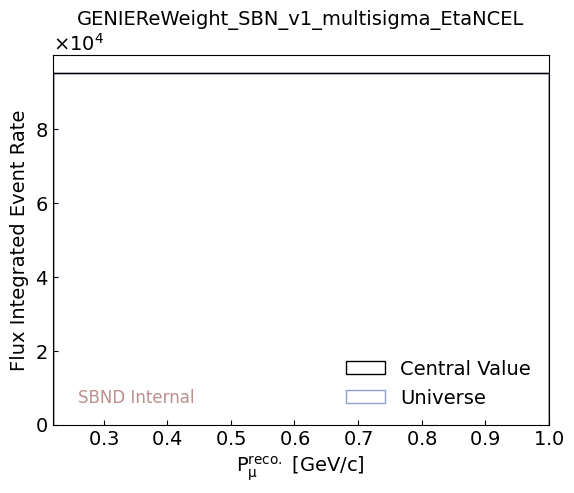

generating covariance for event rate


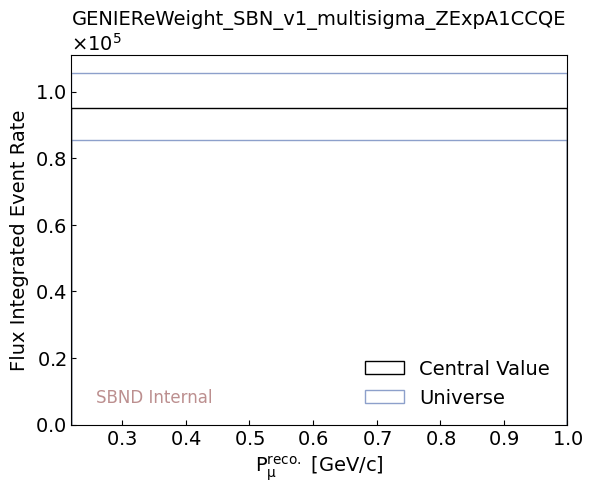

generating covariance for event rate


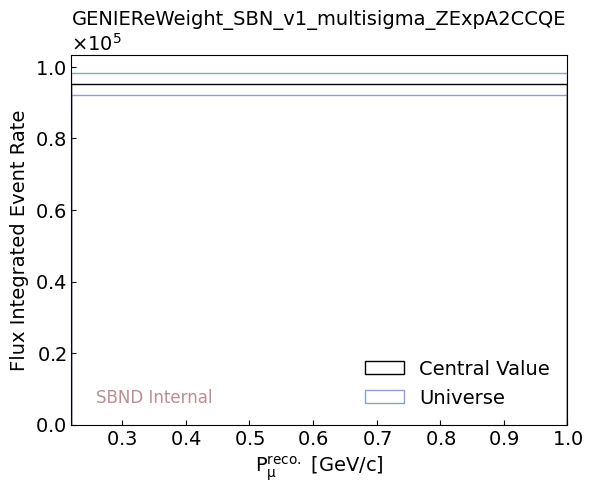

generating covariance for event rate


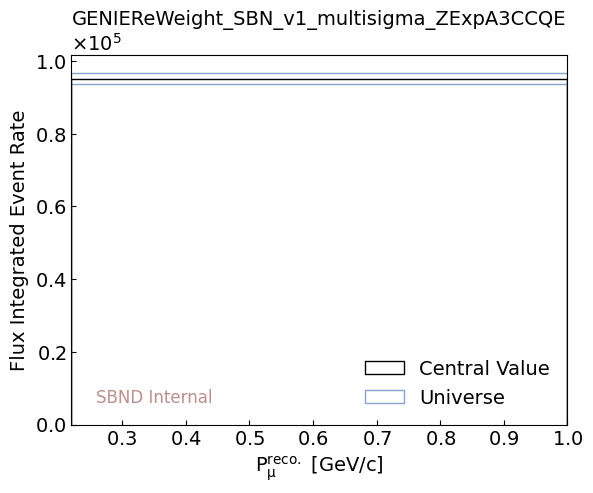

generating covariance for event rate


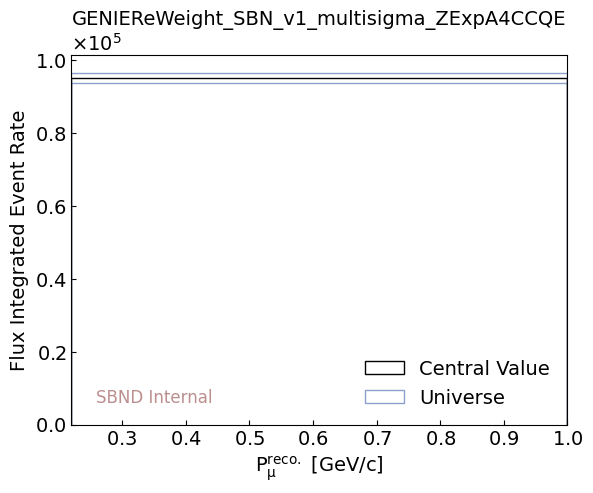

generating covariance for event rate


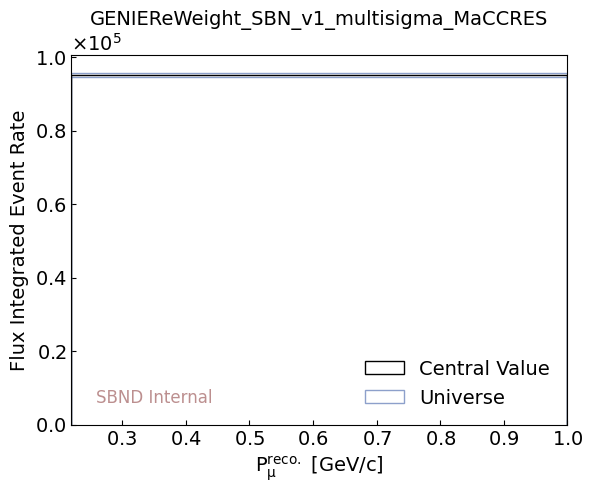

generating covariance for event rate


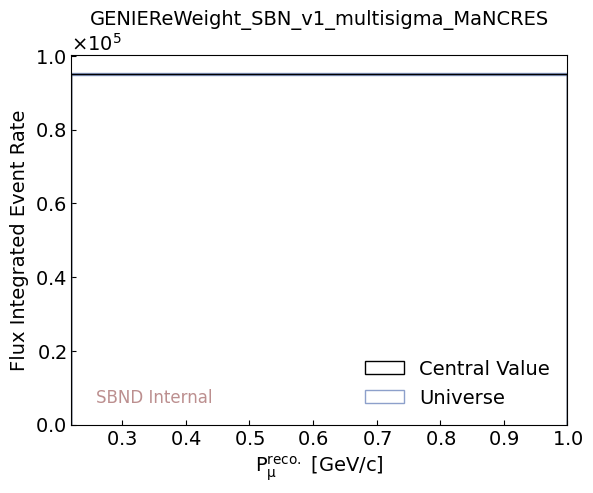

generating covariance for event rate


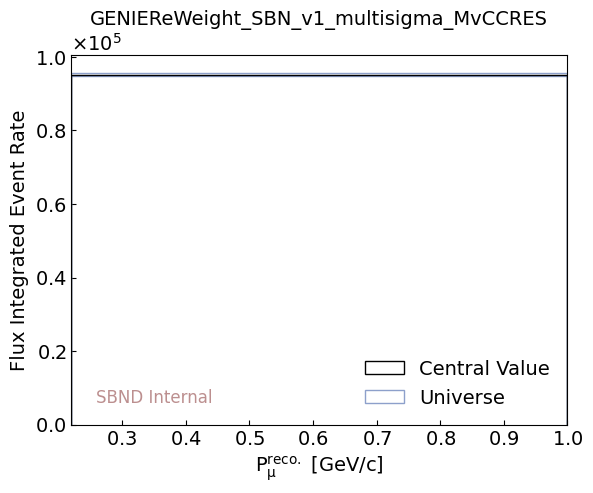

generating covariance for event rate


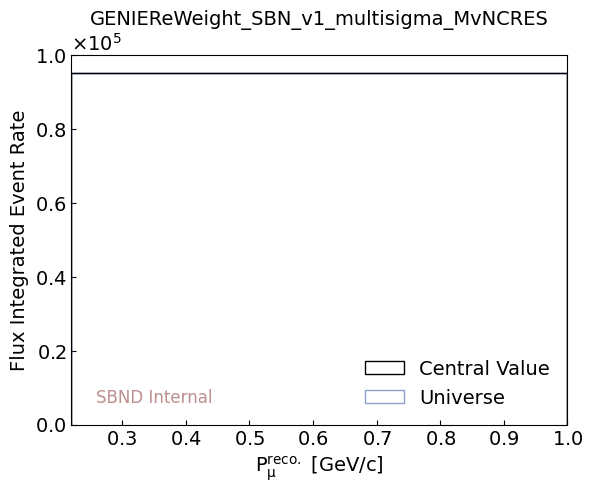

generating covariance for event rate


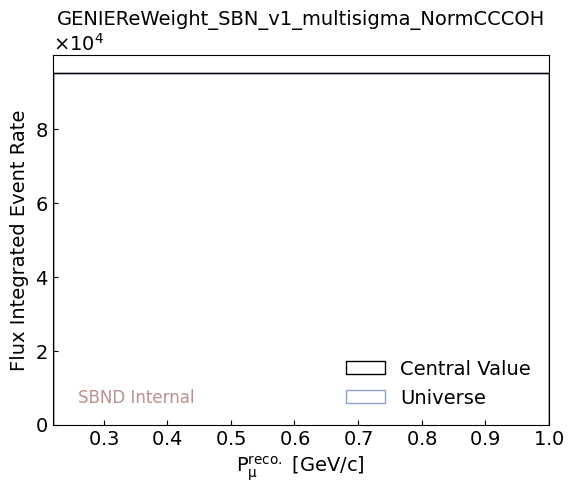

generating covariance for event rate


/tmp/ipykernel_4007735/3445612672.py:170: RuntimeWarning: invalid value encountered in scalar divide
  Correlation[i, j] = Covariance[i, j] / (np.sqrt(Covariance[i, i]) * np.sqrt(Covariance[j, j]))


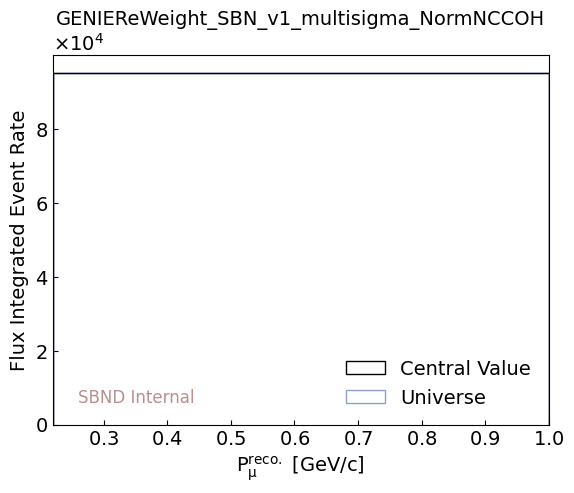

generating covariance for event rate


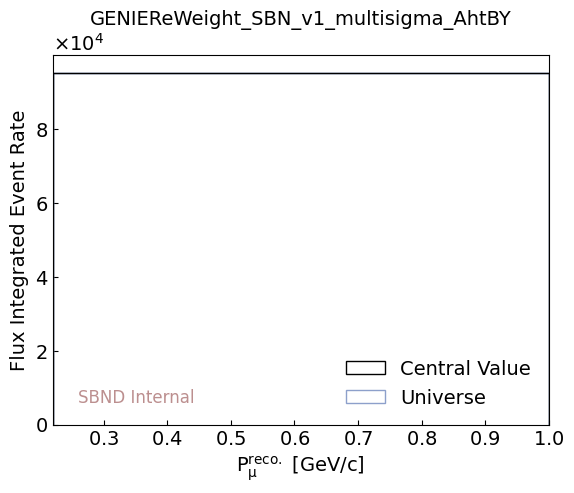

generating covariance for event rate


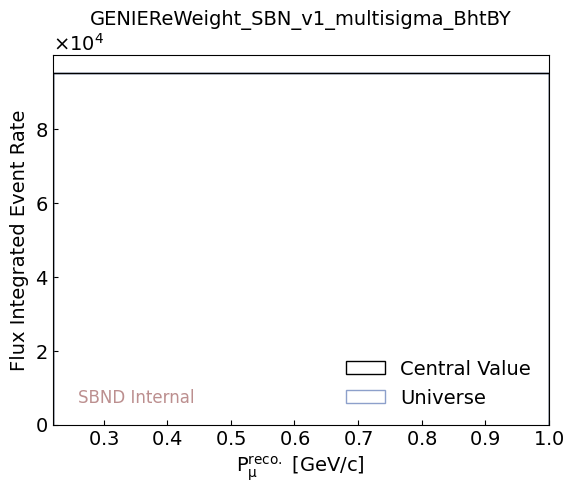

generating covariance for event rate


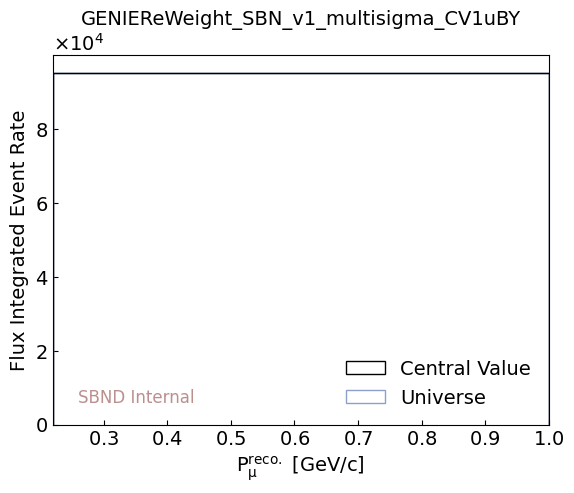

generating covariance for event rate


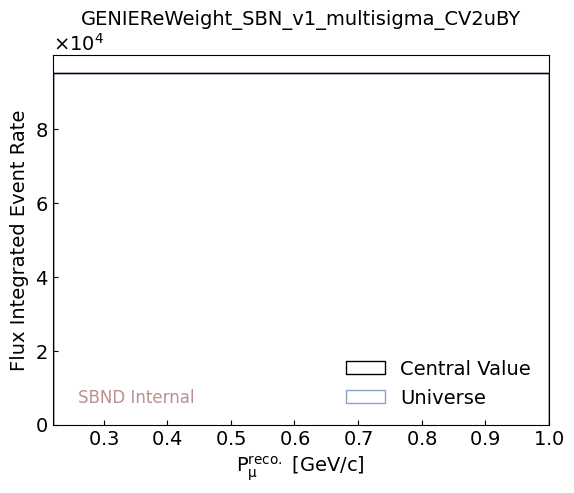

generating covariance for event rate


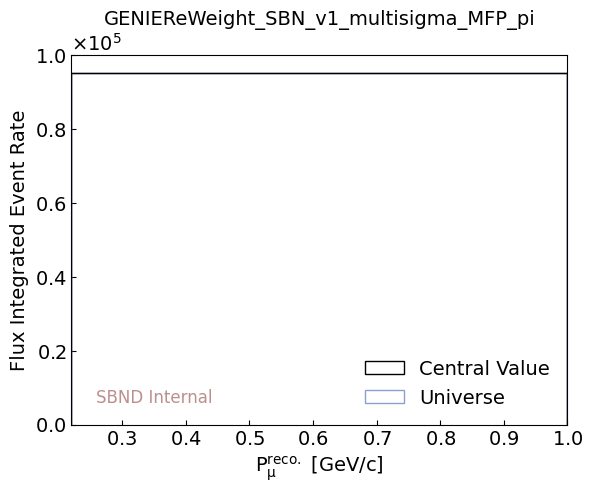

generating covariance for event rate


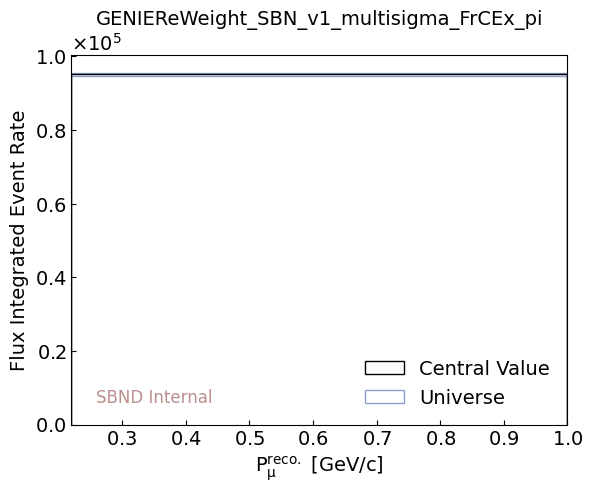

generating covariance for event rate


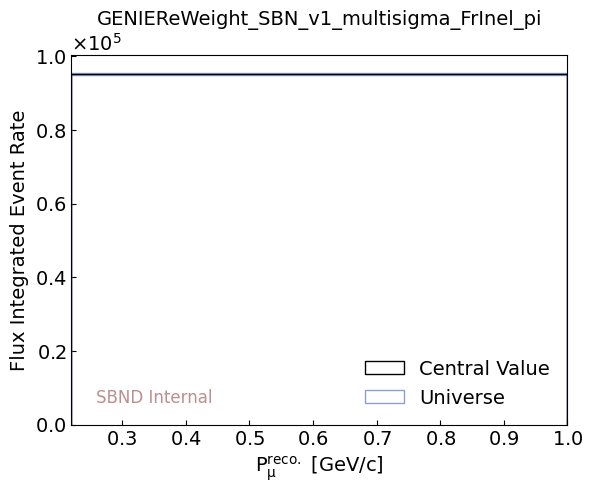

generating covariance for event rate


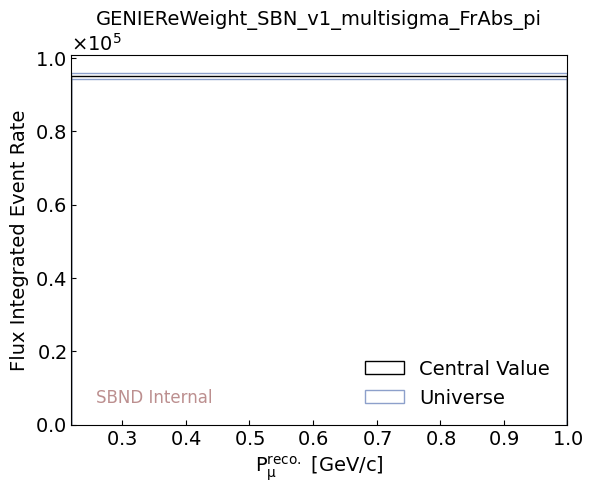

generating covariance for event rate


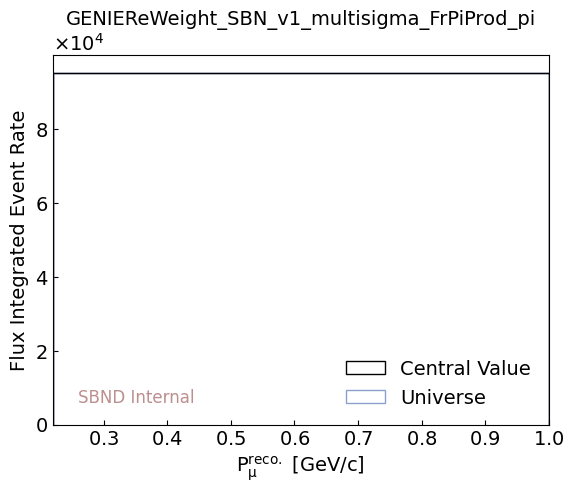

generating covariance for event rate


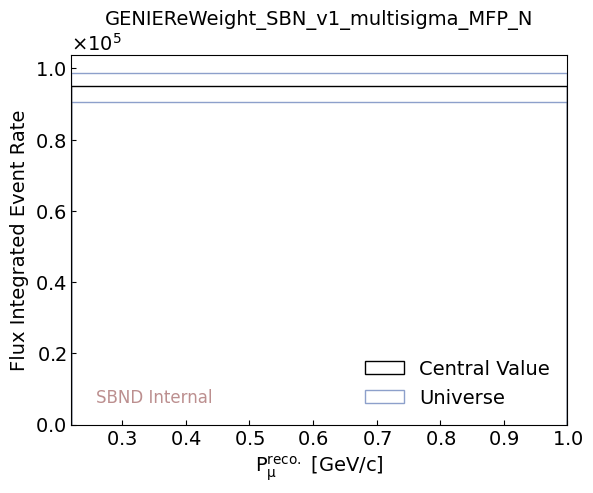

generating covariance for event rate


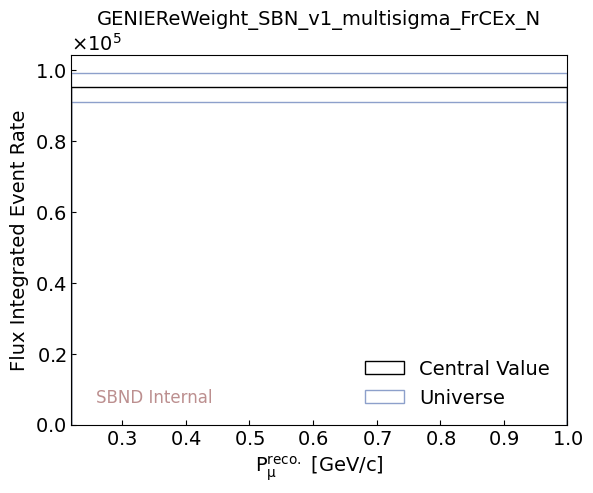

generating covariance for event rate


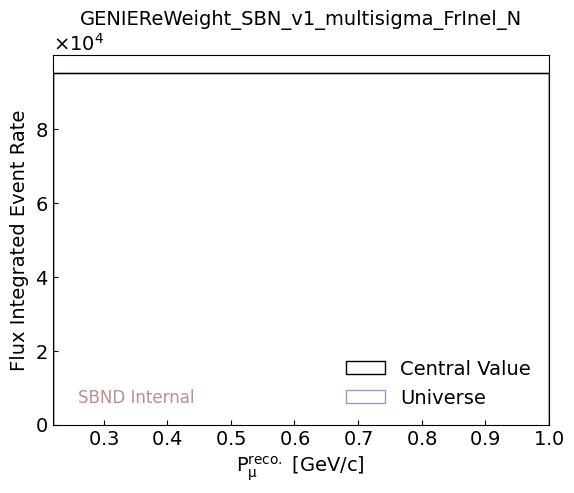

generating covariance for event rate


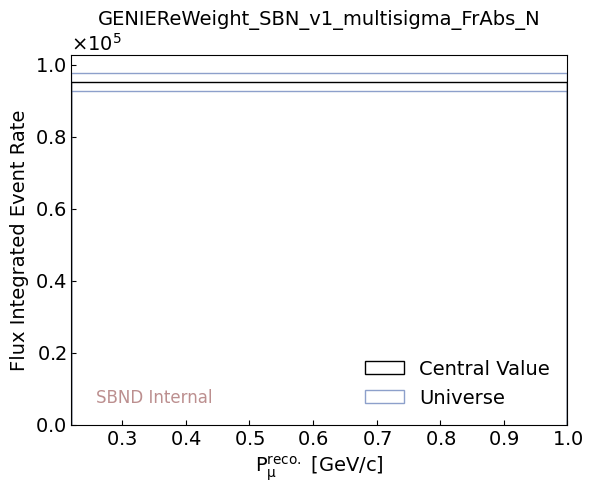

generating covariance for event rate


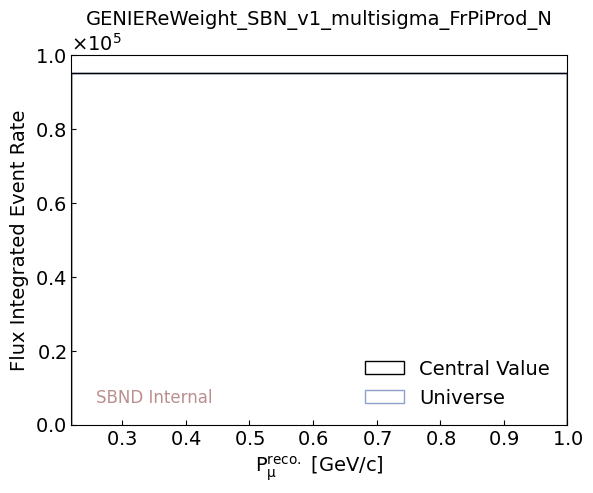

In [186]:
n_univ_genie_multisigma = 2

cov_type = "event"
GENIEmultisigma_Frac_Covariance_event = np.zeros((len(var_config.bins)-1, len(var_config.bins)-1))
plot_labels = [var_config.var_labels[1], "Flux Integrated Event Rate", ""]
for kidx, knob in enumerate(regen_systematics_sbnd_multisigma):
    if "ZExpPCAWeight" in knob:
        continue
    syst_name = knob
    save_fig_name = "{}/{}-{}-geniemultisigma_univ_{}_rates".format(save_fig_dir, var_config.var_save_name, syst_name, cov_type)
    ret_geniemultisigma = get_covariance(cov_type, syst_name, n_univ_genie_multisigma, 
                            nevts_signal_sel_reco, var_signal_sel_truth, var_signal_sel_reco, var_config.bins, 
                            plot_labels, save_fig=False, save_fig_name=save_fig_name)
    GENIEmultisigma_Frac_Covariance_event = GENIEmultisigma_Frac_Covariance_event + ret_geniemultisigma["Covariance_Frac"]

# cov_type = "xsec"
# GENIEmultisigma_Frac_Covariance = np.zeros((len(var_config.bins)-1, len(var_config.bins)-1))
# plot_labels = [var_config.var_labels[1], "xsec"]
# for kidx, knob in enumerate(regen_systematics_sbnd_multisigma):
#     syst_name = knob
#     save_fig_name = "{}/{}-{}-geniemultisigma_univ_{}_rates".format(save_fig_dir, var_config.var_save_name, syst_name, cov_type)
#     ret_geniemultisigma = get_covariance(cov_type, syst_name, n_univ_genie_multisigma, 
#                             nevts_signal_sel_reco, var_signal_sel_truth, var_signal_sel_reco, var_config.bins, 
#                             plot_labels, save_fig=False, save_fig_name=save_fig_name)
#     GENIEmultisigma_Frac_Covariance = GENIEmultisigma_Frac_Covariance + ret_geniemultisigma["Covariance_Frac"]

### Total

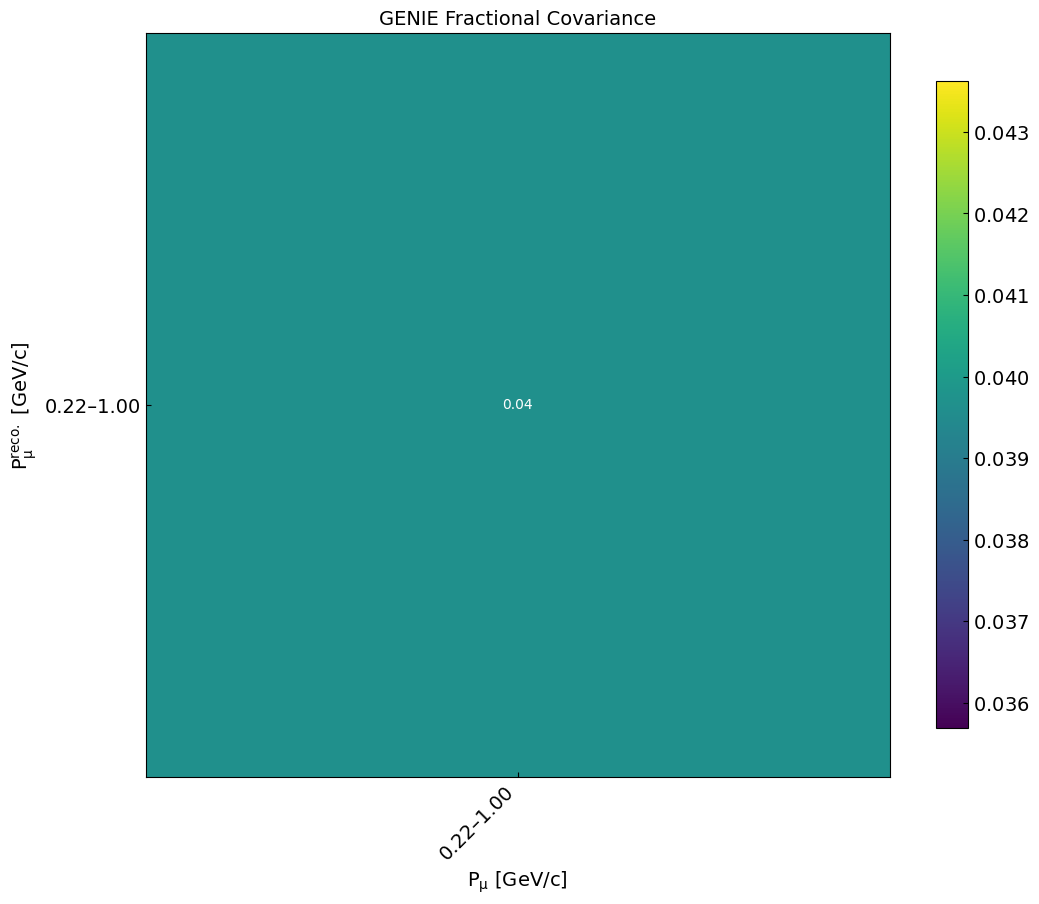

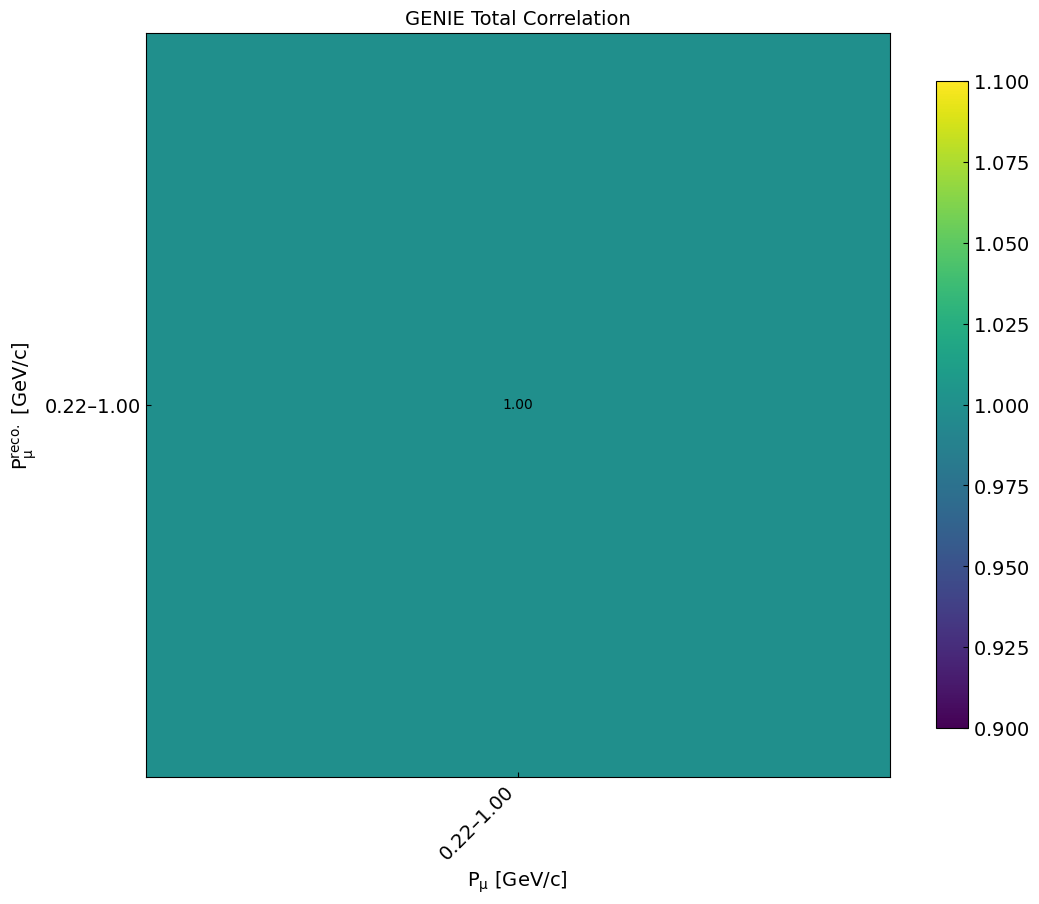

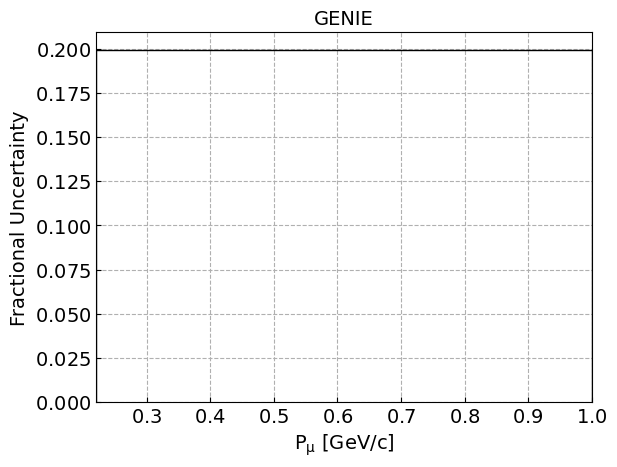

In [187]:
GENIEtotal_Frac_Covariance_evt = ret_genie_evt["Covariance_Frac"] + GENIEmultisigma_Frac_Covariance_event + GENIEmorph_Frac_Covariance_event
save_fig_name = "{}/{}-genie_evt_total_covariance_frac".format(save_fig_dir, var_config.var_save_name)
plot_heatmap(GENIEtotal_Frac_Covariance_evt, "GENIE Fractional Covariance",
             save_fig=save_fig, save_fig_name=save_fig_name)

GENIEtotal_correlation = np.zeros_like(GENIEtotal_Frac_Covariance_evt)
for i in range(GENIEtotal_Frac_Covariance_evt.shape[0]):
    for j in range(GENIEtotal_Frac_Covariance_evt.shape[1]):
        GENIEtotal_correlation[i, j] = GENIEtotal_Frac_Covariance_evt[i, j] / np.sqrt(GENIEtotal_Frac_Covariance_evt[i, i] * GENIEtotal_Frac_Covariance_evt[j, j])
save_fig_name = "{}/{}-genie_evt_total_correlation".format(save_fig_dir, var_config.var_save_name)
plot_heatmap(GENIEtotal_correlation, "GENIE Total Correlation",
             save_fig=save_fig, save_fig_name=save_fig_name)

frac_cov = GENIEtotal_Frac_Covariance_evt
frac_unc = np.sqrt(np.diag(frac_cov))
plt.hist(var_config.bin_centers, bins=var_config.bins, weights=frac_unc, histtype="step", color="black")
plt.xlim(var_config.bins[0], var_config.bins[-1])
plt.xlabel(var_config.var_labels[0])
plt.ylabel("Fractional Uncertainty")
plt.grid(True)
plt.title("GENIE")
plt.show();

# GENIEmultisim_Frac_Covariance = ret_genie["Covariance_Frac"]
# GENIEtotal_Frac_Covariance = GENIEmultisim_Frac_Covariance + GENIEmultisigma_Frac_Covariance + GENIEmorph_Frac_Covariance
# save_fig_name = "{}/{}-genie_total_covariance_frac".format(save_fig_dir, var_config.var_save_name)
# plot_heatmap(GENIEtotal_Frac_Covariance, "GENIE Fractional Covariance",
#              save_fig=save_fig, save_fig_name=save_fig_name)

# GENIEtotal_correlation = np.zeros_like(GENIEtotal_Frac_Covariance)
# for i in range(GENIEtotal_Frac_Covariance.shape[0]):
#     for j in range(GENIEtotal_Frac_Covariance.shape[1]):
#         GENIEtotal_correlation[i, j] = GENIEtotal_Frac_Covariance[i, j] / np.sqrt(GENIEtotal_Frac_Covariance[i, i] * GENIEtotal_Frac_Covariance[j, j])
# save_fig_name = "{}/{}-genie_total_correlation".format(save_fig_dir, var_config.var_save_name)
# plot_heatmap(GENIEtotal_correlation, "GENIE Total Correlation",
#              save_fig=save_fig, save_fig_name=save_fig_name)

# frac_cov = GENIEtotal_Frac_Covariance
# frac_unc = np.sqrt(np.diag(frac_cov))
# plt.hist(var_config.bin_centers, bins=var_config.bins, weights=frac_unc, histtype="step", color="black")
# plt.xlim(var_config.bins[0], var_config.bins[-1])
# plt.xlabel(var_config.var_labels[0])
# plt.ylabel("Fractional Uncertainty")
# plt.grid(True)
# plt.title("GENIE")
# plt.show();

# MC Statistics

In [ ]:
syst_name = "MCstat"
n_univ_mcstat = 500
cov_type = "event"
plot_labels = [var_config.var_labels[1], "Flux Integrated Event Rate"]
save_fig_name = "{}/{}-{}-univ_{}_rates".format(save_fig_dir, var_config.var_save_name, syst_name, cov_type)
ret_mcstat = get_covariance(cov_type, syst_name, n_univ_mcstat, 
                            nevts_signal_sel_reco, var_signal_sel_truth, var_signal_sel_reco, var_config.bins, 
                            plot_labels, save_fig=save_fig, save_fig_name=save_fig_name)

cov_type = "xsec"
plot_labels = [var_config.var_labels[1], "xsec"]
save_fig_name = "{}/{}-{}-univ_{}_rates".format(save_fig_dir, var_config.var_save_name, syst_name, cov_type)
ret_mcstat = get_covariance(cov_type, syst_name, n_univ_mcstat, 
                            nevts_signal_sel_reco, var_signal_sel_truth, var_signal_sel_reco, var_config.bins, 
                            plot_labels, save_fig=save_fig, save_fig_name=save_fig_name)

In [ ]:
syst_name = "MCstat"
save_fig_name = "{}/{}-{}-covariance".format(save_fig_dir, var_config.var_save_name, syst_name)
plot_heatmap(ret_mcstat["Covariance"], "{} Covariance".format(syst_name),
             save_fig=save_fig, save_fig_name=save_fig_name)
save_fig_name = "{}/{}-{}-covariance_frac".format(save_fig_dir, var_config.var_save_name, syst_name)
plot_heatmap(ret_mcstat["Covariance_Frac"], "{} Fractional Covariance".format(syst_name),
             save_fig=save_fig, save_fig_name=save_fig_name)
save_fig_name = "{}/{}-{}-correlation".format(save_fig_dir, var_config.var_save_name, syst_name)
plot_heatmap(ret_mcstat["Correlation"], "{} Correlation".format(syst_name),
             save_fig=save_fig, save_fig_name=save_fig_name)

# Save cov matrices

In [190]:
# frac_cov = GENIEtotal_Frac_Covariance_evt
# frac_unc = np.sqrt(np.diag(frac_cov))
print(frac_unc)

[0.19913918]


In [188]:
# frac_cov_matrices = {}
var_name = "_".join([v for v in var_config.var_nu_col if len(v) > 0])
var_name = "singlebin"
frac_cov_matrices[var_name] = {
    "genie_evt": GENIEtotal_Frac_Covariance_evt
}

print(frac_cov_matrices.keys())

import pickle
with open("/exp/sbnd/data/users/munjung/xsec/2025B/frac_cov_matrices_genie_evt.pkl", "wb") as f:
    pickle.dump(frac_cov_matrices, f)


dict_keys(['mu_totp', 'mu_dir_z', 'p_dir_z', 'del_alpha', 'del_phi', 'p_totp', 'del_Tp', 'singlebin'])


In [ ]:
# var_name = "_".join([v for v in var_config.var_nu_col if len(v) > 0])

# frac_cov_matrices[var_name] = {
#     "flux": ret_flux["Covariance_Frac"],
#     "genie": ret_genie["Covariance_Frac"],
#     "cosmics": Cosmics_Covariance_Frac,
# }

In [ ]:
# save the frac cov matrices to a hdf5 file
import pickle

# with open("/exp/sbnd/data/users/munjung/xsec/2025B/frac_cov_matrices.pkl", "wb") as f:
    # pickle.dump(frac_cov_matrices, f)

# Demo plots for technote

## Event rate variations for each source

In [ ]:
# makes weights for nu events only (i.e. cosmics won't have genie weights)
syst_knob_list = regen_systematics_sbnd_morph
for this_syst in tqdm(syst_knob_list):
    has_genie_weights = (mc_evt_df[this_syst].morph.notna())
    weights_morph = mc_evt_df[has_genie_weights][this_syst].morph

    var = mc_evt_df[has_genie_weights][var_config.var_evt_reco_col]
    var = np.clip(var, var_config.bins[0], var_config.bins[-1] - eps)

    weights_std = (weights_morph-1)
    rand_wgt = np.random.normal(loc=0, scale=1, size=(100))
    n_univ_list = []
    binned_n_univ_list = []
    for i in range(100):
        weights_rand = 1 + np.abs(rand_wgt[i]) * weights_std
        n_univ, _ = np.histogram(var, bins=var_config.bins, weights=weights_rand)
        n_univ_list.append(n_univ)

        n_univ_binned, _, _ = plt.hist(var_config.bin_centers, bins=var_config.bins, weights=n_univ, histtype="step", color="gray", alpha=0.5)
        binned_n_univ_list.append(n_univ_binned)

    alternate_cv_morph, _, _ = plt.hist(var, bins=var_config.bins, weights=weights_morph, histtype="step", color="steelblue")

    std_binned = np.std(binned_n_univ_list, axis=0)
    mean_binned = np.mean(binned_n_univ_list, axis=0)
    plt.errorbar(var_config.bin_centers, mean_binned, yerr=std_binned, fmt="o", color="red")

    plt.title(this_syst)
    plt.show()

## GENIE variations for each mode
- demonstrates why the GENIE uncertainty for this channel is small, by comparing the signal vs. background scale

In [ ]:
syst_name = "GENIE"
for midx,this_mc_evt_df in enumerate(mc_evt_df_divided):
    print(topology_list[midx])
    for uidx in range(99):
        univ_col_evt = (syst_name, "univ_{}".format(uidx), "", "", "", "", "", "")
        univ_col_mc = (syst_name, "univ_{}".format(uidx), "")
        weights = this_mc_evt_df[univ_col_evt].copy()
        weights[np.isnan(weights)] = 1 ## IMPORTANT: make nan weights to 1. to ignore them
        this_var = this_mc_evt_df[var_config.var_evt_reco_col]
        this_var = np.clip(this_var, var_config.bins[0], var_config.bins[-1] - eps)
        # background_univ, _ = np.histogram(this_var, bins=var_config.bins, weights=weights)
        if uidx == 0:
            background_univ, _, _ = plt.hist(this_var, bins=var_config.bins, weights=weights, histtype="step", color=topology_colors[midx], alpha=0.5, label="UV")
        else:
            background_univ, _, _ = plt.hist(this_var, bins=var_config.bins, weights=weights, histtype="step", color=topology_colors[midx], alpha=0.5)
        background_univ = np.array(background_univ)
    # background_cv, _ = np.histogram(this_var, bins=var_config.bins)
    background_cv, _, _ = plt.hist(this_var, bins=var_config.bins, histtype="step", color="black", label="CV")
    background_cv = np.array(background_cv)
    plt.title(topology_labels[midx])
    plt.show();

## Variations on eff, smearing

In [ ]:
# change response matrix to get just the smearing, for demo plots
def get_response_matrix_noeff(reco_vs_true, eff, bins, 
                     plot=True, var_labels=None,
                     save_fig=False, save_fig_name=None):
    denom = reco_vs_true.T.sum(axis=0)
    num = reco_vs_true.T
    Response = np.divide(
        # num * eff, denom,
        num, denom,
        out=np.zeros_like(num, dtype=float),  # fill with 0 where invalid
        where=denom != 0
    )

    if plot:
        fig, ax = plt.subplots(figsize=(10, 10))
        unif_bin = np.linspace(0., float(len(bins) - 1), len(bins))
        extent = [unif_bin[0], unif_bin[-1], unif_bin[0], unif_bin[-1]]
        plt.imshow(Response, extent=extent, origin="lower", cmap="viridis")
        plt.colorbar(label="Response", shrink=0.7)

        x_edges = np.array(bins)
        y_edges = np.array(bins)
        x_tick_positions = (unif_bin[:-1] + unif_bin[1:]) / 2
        y_tick_positions = (unif_bin[:-1] + unif_bin[1:]) / 2

        x_labels = bin_range_labels(x_edges)
        y_labels = bin_range_labels(y_edges)

        plt.xticks(x_tick_positions, x_labels, rotation=45, ha="right")
        plt.yticks(y_tick_positions, y_labels)

        if var_labels is not None:
            plt.xlabel(var_labels[2], fontsize=20)
            plt.ylabel(var_labels[1], fontsize=20)

        for i in range(Response.shape[0]):      # rows (y)
            for j in range(Response.shape[1]):  # columns (x)
                value = Response[i, j]
                if not np.isnan(value):  # skip NaNs
                    plt.text(
                        j + 0.5, i + 0.5,
                        f"{value:.3f}",
                        ha="center", va="center",
                        color=get_text_color(value),
                        fontsize=10
                    )

        plt.title("Response", fontsize=20)
        plt.tight_layout()

        if save_fig and save_fig_name is not None:
            plt.savefig("{}.pdf".format(save_fig_name), bbox_inches="tight")
        plt.show()
    return Response

In [ ]:
from analysis_village.unfolding.unfolding_inputs import get_text_color, bin_range_labels

true_signal_univ, _ = np.histogram(var_truth_signal, bins=var_config.bins)
smear_cv = get_smear_matrix(var_signal_sel_truth, var_signal_sel_reco, var_config.bins, plot=False)
eff_cv = get_eff(smear_cv, true_signal_univ) 

eff_vars = ret_genie["univ_effs"]
for i in range(len(eff_vars)):
    if i == 0:
        plt.hist(var_config.bin_centers, bins=var_config.bins, weights=eff_vars[i], histtype="step", color="steelblue", alpha=0.5,
        label="UV")
    else:
        plt.hist(var_config.bin_centers, bins=var_config.bins, weights=eff_vars[i], histtype="step", color="steelblue", alpha=0.5)
plt.hist(var_config.bin_centers, bins=var_config.bins, weights=eff_cv, histtype="step", color="black", label="CV")
plt.xlim(var_config.bins[0], var_config.bins[-1])
plt.xlabel(var_config.var_labels[0])
plt.ylabel("Efficiency")
plt.title("GENIE Systematics")
plt.legend()
if save_fig:
    plt.savefig(path.join(save_fig_dir, "{}-{}-genie-effs".format(var_config.var_save_name, syst_name)))
plt.show();


smear_vars = ret_genie["univ_smears"]
smear_std = np.std(smear_vars, axis=0)
smear_mean = np.mean(smear_vars, axis=0)

# diagonal elements
for i in range(len(smear_vars)):
    this_diag = np.diag(smear_vars[i])
    plt.hist(var_config.bin_centers, bins=var_config.bins, weights=this_diag, histtype="step", color="steelblue", alpha=0.5)
cv_diag = np.diag(smear_cv)
plt.hist(var_config.bin_centers, bins=var_config.bins, weights=cv_diag, histtype="step", color="black")
plt.xlim(var_config.bins[0], var_config.bins[-1])
plt.xlabel(var_config.var_labels[0])
plt.ylabel("Diagonal Elements of Smearing Matrix")
plt.title("GENIE Systematics")
plt.show();

# full matrix
fig, ax = plt.subplots(figsize=(10, 10))
unif_bin = np.linspace(0., float(len(var_config.bins) - 1), len(var_config.bins))
extent = [unif_bin[0], unif_bin[-1], unif_bin[0], unif_bin[-1]]

plt.imshow(smear_std/smear_cv, extent=extent, origin="lower", cmap="viridis")
plt.colorbar(label="Univ Std / Univ Mean", shrink=0.7)

x_edges = np.array(var_config.bins)
y_edges = np.array(var_config.bins)
x_tick_positions = (unif_bin[:-1] + unif_bin[1:]) / 2
y_tick_positions = (unif_bin[:-1] + unif_bin[1:]) / 2

x_labels = bin_range_labels(x_edges)
y_labels = bin_range_labels(y_edges)

plt.xticks(x_tick_positions, x_labels, rotation=45, ha="right")
plt.yticks(y_tick_positions, y_labels)

for i in range(smear_std.shape[0]):      # rows (y)
    for j in range(smear_std.shape[1]):  # columns (x)
        value = smear_std[i, j] / smear_cv[i, j]
        if not np.isnan(value):  # skip NaNs
            plt.text(
                j + 0.5, i + 0.5,
                f"{value:.2f}",
                ha="center", va="center",
                color=get_text_color(value),
                fontsize=10
            )

plt.xlabel(var_config.var_labels[2])
plt.ylabel(var_config.var_labels[1])
plt.title("GENIE Systematics")
plt.show();

# smeared event rates
for i in range(len(smear_vars)):
    # this_events = smear_vars[i] @ nevts_signal_truth
    this_response = get_response_matrix_noeff(smear_vars[i], eff_vars[i], var_config.bins, plot=False)
    this_events = this_response @ nevts_signal_sel_truth
    if i == 0:
        plt.hist(var_config.bin_centers, bins=var_config.bins, weights=this_events, histtype="step", color="steelblue", alpha=0.5,
        label="UV")
    else:
        plt.hist(var_config.bin_centers, bins=var_config.bins, weights=this_events, histtype="step", color="steelblue", alpha=0.5)
# cv_events = smear_cv @ nevts_signal_sel_truth # note that we multiply the CV signal rate!
cv_response = get_response_matrix_noeff(smear_cv, eff_cv, var_config.bins, plot=False)
cv_events = cv_response @ nevts_signal_sel_truth
plt.hist(var_config.bin_centers, bins=var_config.bins, weights=cv_events, histtype="step", color="black", label="CV")
plt.xlim(var_config.bins[0], var_config.bins[-1])
plt.xlabel(var_config.var_labels[0])
plt.ylabel("Selected Event Rates")
plt.title("GENIE Systematics")
plt.legend()
if save_fig:
    plt.savefig(path.join(save_fig_dir, "{}-{}-genie-smeared_events".format(var_config.var_save_name, syst_name)))
plt.show();